In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read all freeze_frame data set 

freeze_frame = pd.read_csv('freeze_frame_index_all.csv')
freeze_frame_1_bouts = freeze_frame[freeze_frame['bouts'] == 1]
freeze_frame_125_bouts = freeze_frame[freeze_frame['bouts'] == 1.25]
freeze_frame_15_bouts = freeze_frame[freeze_frame['bouts'] == 1.5]
freeze_frame_175_bouts = freeze_frame[freeze_frame['bouts'] == 1.75]
freeze_frame_2_bouts = freeze_frame[freeze_frame['bouts'] == 2]

In [8]:
# # so same mice: ptsd2_84_recall1, let's do 1s as bout first 

ptsd2_84_recall1_1 = freeze_frame_1_bouts[(freeze_frame_1_bouts['cohort_id'] == 'ptsd2_84') & (freeze_frame_1_bouts['day'] == 'recall1')]
ptsd2_85_recall1_1 = freeze_frame_1_bouts[(freeze_frame_1_bouts['cohort_id'] == 'ptsd2_85') & (freeze_frame_1_bouts['day'] == 'recall1')]

# ptsd2_84_recall1_125 = freeze_frame_125_bouts[(freeze_frame_125_bouts['cohort_id'] == 'ptsd2_84') & (freeze_frame_125_bouts['day'] == 'recall1')]
# ptsd2_84_recall1_15 = freeze_frame_15_bouts[(freeze_frame_15_bouts['cohort_id'] == 'ptsd2_84') & (freeze_frame_15_bouts['day'] == 'recall1')]
# ptsd2_84_recall1_175 = freeze_frame_175_bouts[(freeze_frame_175_bouts['cohort_id'] == 'ptsd2_84') & (freeze_frame_175_bouts['day'] == 'recall1')]
# ptsd2_84_recall1_2 = freeze_frame_2_bouts[(freeze_frame_2_bouts['cohort_id'] == 'ptsd2_84') & (freeze_frame_2_bouts['day'] == 'recall1')]


# dlc_ptsd2_84_recall1_1 = dlc_to_long('/Users/novak/Documents/Columbia/mentored_research/Turi/dlc_csv/ptsd2_recall1_84DLC_resnet50_phi_cfc_boxNov7shuffle1_388000.csv')
# dlc_ptsd2_85_recall1_1 = dlc_to_long('/Users/novak/Documents/Columbia/mentored_research/Turi/dlc_csv/ptsd2_recall1_85DLC_resnet50_phi_cfc_boxNov7shuffle1_388000.csv')


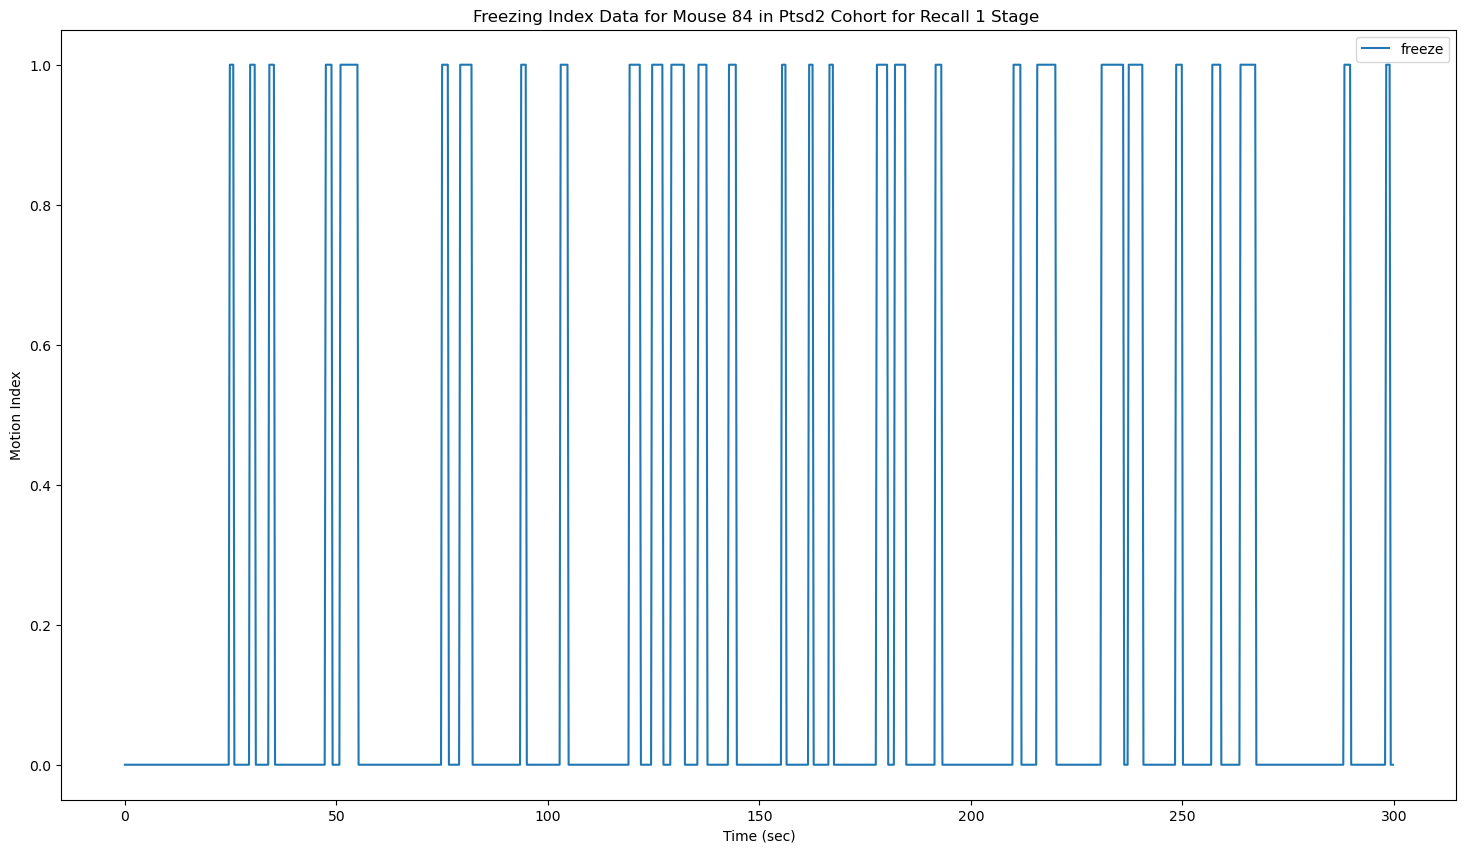

In [10]:
ptsd2_84_recall1_1.plot(x='t(sec)', y='freeze', kind='line', title='Freezing Index Data for Mouse 84 in Ptsd2 Cohort for Recall 1 Stage ', figsize=(18, 10))
plt.xlabel('Time (sec)')
plt.ylabel('Motion Index')
plt.show()

In [109]:
ptsd2_84_recall1_1

t(sec)  motion_index  freeze cohort_id      day  bouts  freeze_shift
8984     0.00         41.99       0  ptsd2_84  recall1    1.0             0
8985     0.57         35.32       0  ptsd2_84  recall1    1.0             0
8986     0.80         69.97       0  ptsd2_84  recall1    1.0             0
8987     1.07         45.01       0  ptsd2_84  recall1    1.0             0
8988     1.34         70.86       0  ptsd2_84  recall1    1.0             0
...       ...           ...     ...       ...      ...    ...           ...
10102  298.71          1.73       1  ptsd2_84  recall1    1.0             1
10103  298.98          2.83       1  ptsd2_84  recall1    1.0             1
10104  299.25         78.37       0  ptsd2_84  recall1    1.0             1
10105  299.51         56.39       0  ptsd2_84  recall1    1.0             0
10106  299.78         68.96       0  ptsd2_84  recall1    1.0             0

[1123 rows x 7 columns]

In [31]:
dlc_ptsd2_84_recall1_1

x          y  likelihood cohort_id      day body_part  index  \
0      162.075623   1.896631    0.000012  ptsd2_84  recall1      nose      0   
1      172.090347  39.997040    0.999834  ptsd2_84  recall1      nose      1   
2      143.152420   8.015402    0.014098  ptsd2_84  recall1      nose      2   
3      138.329163  17.839588    0.217031  ptsd2_84  recall1      nose      3   
4      113.348343  34.029221    0.962053  ptsd2_84  recall1      nose      4   
...           ...        ...         ...       ...      ...       ...    ...   
13483  175.092133  91.819916    0.000473  ptsd2_84  recall1     tail2   1119   
13484  175.169617  91.934372    0.000490  ptsd2_84  recall1     tail2   1120   
13485  170.565018   2.523091    0.000596  ptsd2_84  recall1     tail2   1121   
13486  206.607071  54.798939    0.000630  ptsd2_84  recall1     tail2   1122   
13487  229.122391  74.882904    0.000415  ptsd2_84  recall1     tail2   1123   

       t(sec)  
0        0.00  
1        0.27  
2        0.53  
3        0.80  
4        1.07  
...       ...  
13483  298.67  
13484  298.93  
13485  299.20  
13486  299.47  
13487  299.73  

[13488 rows x 8 columns]

In [5]:
import pandas as pd
import re
import os


def dlc_to_long(file_path):
    """
    Transforms wide DLC data into a long format, using metadata rows to structure columns
    and extracts cohort_id from the file name.
    
    Parameters:
    - file_path: String representing the file path to the wide-format positional data CSV.
    
    Returns:
    - long_data: DataFrame in long format with columns ['x', 'y', 'likelihood', 'body_part', 'coords', 'cohort_id'].
    """
    
    # Extract the file name from the file path
    file_name = os.path.basename(file_path)
    
    # Attempt to match both formats
    match1 = re.match(r'(\w+)_([a-zA-Z]+\d*)_(\d+)', file_name)  # Format 1
    match2 = re.match(r'(\w+)_([a-zA-Z]+\d*)_(\d+)-(\d+)', file_name)  # Format 2

    if match2:  # only for ptsd9 group (ptsd9 group have longer cohort_id such as ptsd9_31_2)
        cohort_prefix = match2.group(1)  # 'ptsd9'
        day = match2.group(2)            # 'recall4'
        cohort_number1 = match2.group(3)  # '31'
        cohort_number2 = match2.group(4)  # '2'
        cohort_id = f"{cohort_prefix}_{cohort_number1}_{cohort_number2}"  # 'ptsd9_31_2'
    elif match1:  # for all other groups 
        cohort_prefix = match1.group(1)  # 'ptsd2'
        day = match1.group(2)            # 'recall1'
        cohort_number = match1.group(3)  # '81'
        cohort_id = f"{cohort_prefix}_{cohort_number}"  # 'ptsd2_81'
    else:
        cohort_id = 'unknown'
        day = 'unknown'
    
    raw_data = pd.read_csv(file_path)
    
    # Extract body parts from the first metadata row and coordinate types from the second row
    body_parts = raw_data.iloc[0, 1::3].values
    coordinates = ["x", "y", "likelihood"]
    
    # Generate column names using body parts and coordinates
    column_names = [f"{body}_{coord}" for body in body_parts for coord in coordinates]
    
    # Reload the dataset, skipping metadata rows and assigning correct column names
    data = pd.read_csv(file_path, skiprows=[0, 1])
    data = data.iloc[:, 1:]  # Drop the first unnecessary 'coords' column
    data.columns = column_names
    
    # Insert 'cohort_id' and 'day' column
    data['cohort_id'] = cohort_id
    data['day'] = day
    
    # Convert to long format
    long_data = pd.DataFrame()
    for part in body_parts:
        part_data = data[[f"{part}_x", f"{part}_y", f"{part}_likelihood", 'cohort_id', 'day']].copy()
        part_data.columns = ['x', 'y', 'likelihood', 'cohort_id', 'day']
        part_data['body_part'] = part
        part_data['index'] = part_data.index
        part_data['t(sec)'] = (part_data['index'] / len(part_data) * 300).round(2)
        long_data = pd.concat([long_data, part_data], ignore_index=True)
    
    return long_data


In [8]:
def process_dlc_folder(folder_path):
    """
    Processes all relevant DLC CSV files in a folder, converts them to long format, and
    concatenates them into a single DataFrame.
    
    Parameters:
    - folder_path: String representing the path to the folder containing DLC CSV files.
    
    Returns:
    - combined_data: DataFrame containing all processed data in long format.
    """
    combined_data = pd.DataFrame()
    
    # List all files in the folder
    all_files = os.listdir(folder_path)
    
    # Filter for relevant DLC CSV files
    dlc_files = [f for f in all_files if f.endswith('.csv') and 'DLC' in f]
    
    successful_count = 0

    # Process each file
    for file_name in dlc_files:
        file_path = os.path.join(folder_path, file_name)
        # Process the file using dlc_to_long
        try:
            long_data = dlc_to_long(file_path)
            combined_data = pd.concat([combined_data, long_data], ignore_index=True)
            successful_count += 1
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            continue
    
    print(f"Successfully processed {successful_count} files.")

    return combined_data

In [9]:
def get_shape(folder_path):
    """

    """    
    # List all files in the folder
    all_files = os.listdir(folder_path)
    
    # Filter for relevant DLC CSV files
    dlc_files = [f for f in all_files if f.endswith('.csv') and 'DLC' in f]
    
    successful_count = 0

    # Process each file
    for file_name in dlc_files:
        file_path = os.path.join(folder_path, file_name)
        # Process the file using dlc_to_long
        try:
            long_data = dlc_to_long(file_path)
            combined_data = pd.concat([combined_data, long_data], ignore_index=True)
            successful_count += 1
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            continue
    
    print(f"Successfully processed {successful_count} files.")

    return combined_data

In [10]:
dlc_frames = process_dlc_folder('/Users/novak/Documents/Columbia/mentored_research/Turi/dlc_csv')

Successfully processed 140 files.


In [11]:
import os
import pandas as pd

def check_dlc_shapes(folder_path):
    """
    Checks all relevant DLC CSV files in a folder for the expected shape of (1124, 8).
    If a file does not match this shape, prints the file name and its shape.
    
    Parameters:
    - folder_path: String representing the path to the folder containing DLC CSV files.
    """
    # List all files in the folder
    all_files = os.listdir(folder_path)
    
    # Filter for relevant DLC CSV files
    dlc_files = [f for f in all_files if f.endswith('.csv') and 'DLC' in f]
    
    successful_count = 0
    outlier_files = []

    # Process each file
    for file_name in dlc_files:
        file_path = os.path.join(folder_path, file_name)
        try:
            long_data = dlc_to_long(file_path)
            if long_data.shape == (13488, 8):
                successful_count += 1
            else:
                outlier_files.append((file_name, long_data.shape))
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            continue
    
    print(f"Successfully processed {successful_count} files with the expected shape (1124, 8).")
    if outlier_files:
        print("Files with unexpected shapes:")
        for file_name, shape in outlier_files:
            print(f"  - {file_name}: {shape}")
    else:
        print("All files have the expected shape.")



In [305]:
# # load in DLC file and pass it through the function 

# file_path = '/Users/novak/Documents/Columbia/mentored_research/Turi/DLC_1107/ptsd2_recall1_84DLC_resnet50_phi_cfc_boxNov7shuffle1_388000.csv'
# ptsd2_84_recall1_dlc = dlc_to_long(file_path)
# # ptsd2_84_recall1_dlc['cohort_id'] = 'ptsd2_84_recall1'

# # Display the first few rows
# ptsd2_84_recall1_dlc.head()

In [12]:
# def find_freeze_to_non_freeze(freeze_frame_data):
#     """
#     Finds the timestamps where the 'freeze' column changes from 1 to 0.
    
#     Parameters:
#     - freeze_frame_data: DataFrame containing freeze frame data with 'freeze' and 't(sec)' columns.
    
#     Returns:
#     - List of timestamps in seconds where freeze transitions from 1 to 0.
#     """
#     # Ensure 't(sec)' is numeric
#     # freeze_frame_data['t(sec)'] = pd.to_numeric(freeze_frame_data['t(sec)'], errors='coerce')
    
#     # Shift the freeze column to compare current and previous rows
#     freeze_frame_data.loc[:, 'freeze_shift'] = freeze_frame_data['freeze'].shift(1).fillna(0)
    
#     # Identify points where freeze changes from 1 to 0
#     transitions = freeze_frame_data[(freeze_frame_data['freeze_shift'] == 1) & (freeze_frame_data['freeze'] == 0)]
    
#     # Extract the timestamps for these transitions
#     return transitions['t(sec)'].tolist()



def find_freeze_transitions(freeze_frame_data):
    """
    Identifies the timestamps where the 'freeze' column in the freeze frame data transitions:
    - From 1 to 0 (offset)
    - From 0 to 1 (onset)

    Parameters:
    - freeze_frame_data: DataFrame containing a 'freeze' column.

    Returns:
    - A DataFrame with columns ['t(sec)', 'transition_type'] where 'transition_type' indicates
      'onset' or 'offset'.
    """
    # Shift the 'freeze' column to compare with the previous value
    freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)
    
    # Find offset transitions (from 1 to 0)
    offset_transitions = freeze_frame_data[(freeze_frame_data['freeze_shift'] == 1) & (freeze_frame_data['freeze'] == 0)]
    offset_transitions = offset_transitions[['t(sec)']].copy()
    offset_transitions['transition_type'] = 'offset'
    
    # Find onset transitions (from 0 to 1)
    onset_transitions = freeze_frame_data[(freeze_frame_data['freeze_shift'] == 0) & (freeze_frame_data['freeze'] == 1)]
    onset_transitions = onset_transitions[['t(sec)']].copy()
    onset_transitions['transition_type'] = 'onset'
    
    # Combine the onset and offset transitions into a single DataFrame
    all_transitions = pd.concat([onset_transitions, offset_transitions], ignore_index=True)
    
    # Sort transitions by time for clarity
    all_transitions = all_transitions.sort_values(by='t(sec)').reset_index(drop=True)
    
    return all_transitions


In [17]:
freeze_points = find_freeze_transitions(ptsd2_84_recall1_1)
freeze_points_2 = find_freeze_transitions(ptsd2_85_recall1_1)

len(freeze_points), len(freeze_points_2)

/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)
/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


(58, 94)

In [13]:
import numpy as np

def calculate_median_freeze_duration(freeze_frame_data):
    """
    Calculates the overall median freeze duration across all cohort_id and day combinations.
    
    Parameters:
    - freeze_frame_data: DataFrame containing freeze frame data with columns:
        - 't(sec)': Time in seconds
        - 'freeze': Binary freeze indicator (1 for freeze, 0 for not freezing)
        - 'cohort_id': Identifier for the cohort
        - 'day': Identifier for the day
    
    Returns:
    - overall_median: The overall median freeze duration across all cohort_id and day combinations.
    """
    # Extract unique cohort_ids and days
    cohort_ids = freeze_frame_data['cohort_id'].unique()
    days = freeze_frame_data['day'].unique()
    
    # List to store freeze durations across all cohort_id and day
    all_freeze_durations = []

    # Loop through each unique cohort_id and day
    for cohort_id in cohort_ids:
        for day in days:
            # Filter data for the current cohort_id and day
            cohort_day_data = freeze_frame_data[
                (freeze_frame_data['cohort_id'] == cohort_id) & 
                (freeze_frame_data['day'] == day)
            ]
            
            # Print message if the data is empty
            if cohort_day_data.empty:
                print(f"No data for cohort_id: {cohort_id}, day: {day}")
                continue
            
            # List to store freeze durations for the current cohort_id and day
            freeze_durations = []
            is_freezing = False
            freeze_start = None
            
            # Iterate through the cohort/day data
            for _, row in cohort_day_data.iterrows():
                if row['freeze'] == 1 and not is_freezing:
                    is_freezing = True
                    freeze_start = row['t(sec)']
                elif row['freeze'] == 0 and is_freezing:
                    is_freezing = False
                    freeze_end = row['t(sec)']
                    freeze_durations.append(freeze_end - freeze_start)
            
            # Handle ongoing freeze at the end of the data
            if is_freezing and freeze_start is not None:
                freeze_end = cohort_day_data['t(sec)'].iloc[-1]
                freeze_durations.append(freeze_end - freeze_start)
            
            # Append the current cohort/day durations to the overall list
            all_freeze_durations.extend(freeze_durations)

    # Calculate the overall median freeze duration
    overall_median = np.median(all_freeze_durations) if all_freeze_durations else 0
    return overall_median


In [17]:
median_1 = calculate_median_freeze_duration(freeze_frame_1_bouts)
median_125 = calculate_median_freeze_duration(freeze_frame_125_bouts)
median_15 = calculate_median_freeze_duration(freeze_frame_15_bouts)
median_175 = calculate_median_freeze_duration(freeze_frame_175_bouts)
median_2 = calculate_median_freeze_duration(freeze_frame_2_bouts)

In [18]:
median_1, median_125, median_15, median_175, median_2

(1.8699999999999761,
 2.1399999999999864,
 2.4099999999999966,
 2.670000000000016,
 2.670000000000016)

In [18]:
# def find_closest_timestamps(freeze_timestamps, dlc_data, body_part, margin=0.113):
#     """
#     Finds the closest matching timestamps in the DLC data for each freeze frame timestamp.
    
#     Parameters:
#     - freeze_timestamps: List of timestamps from freeze frame data (in seconds).
#     - dlc_data: DataFrame containing DLC data with a 't(sec)' column representing time in seconds.
#     - margin: Float value specifying the maximum allowable difference in seconds (default is 0.113).
    
#     Returns:
#     - List of tuples (freeze_timestamp, closest_dlc_timestamp) where each DLC timestamp
#       is the closest match to a freeze frame timestamp within the given margin.
#     """
#     # Ensure 't(sec)' in DLC data is numeric
#     # dlc_data['t(sec)'] = pd.to_numeric(dlc_data['t(sec)'], errors='coerce')
    
#     dlc_data = dlc_data[dlc_data['body_part'] == body_part]

#     matched_timestamps = []
#     for t1 in freeze_timestamps:
#         # Find the DLC timestamps within the margin range
#         within_margin = dlc_data[(dlc_data['t(sec)'] >= t1 - margin) & (dlc_data['t(sec)'] <= t1 + margin)]
        
#         if not within_margin.empty:
#             # Find the closest timestamp within the margin
#             closest_dlc_time = within_margin.iloc[(within_margin['t(sec)'] - t1).abs().argmin()]['t(sec)']
#             matched_timestamps.append((t1, closest_dlc_time))
#         else:
#             # If no match is found within the margin, append None for the DLC timestamp
#             matched_timestamps.append((t1, None))

#     return matched_timestamps

def find_closest_timestamps(freeze_transitions, dlc_data, body_part, margin=0.113):
    """
    Finds the closest matching timestamps in the DLC data for each freeze frame transition.
    
    Parameters:
    - freeze_transitions: List of tuples or DataFrame with columns ('t(sec)', 'transition_type') representing 
      transition times (onset or offset) from freeze frame data.
    - dlc_data: DataFrame containing DLC data with a 't(sec)' column representing time in seconds.
    - body_part: The body part to analyze (e.g., 'nose') for filtering DLC data.
    - margin: Float value specifying the maximum allowable difference in seconds (default is 0.113).
    
    Returns:
    - List of tuples (freeze_timestamp, closest_dlc_timestamp, transition_type) where each DLC timestamp
      is the closest match to a freeze frame timestamp within the given margin.
    """
    
    # Ensure freeze_transitions is a list of tuples
    if isinstance(freeze_transitions, pd.DataFrame):
        freeze_transitions = freeze_transitions[['t(sec)', 'transition_type']].to_records(index=False).tolist()

    # Filter DLC data for the specified body part
    dlc_data = dlc_data[dlc_data['body_part'] == body_part]

    matched_timestamps = []

    for freeze_time, transition_type in freeze_transitions:
        # Find the DLC timestamps within the margin range
        within_margin = dlc_data[(dlc_data['t(sec)'] >= freeze_time - margin) & 
                                 (dlc_data['t(sec)'] <= freeze_time + margin)]
        
        if not within_margin.empty:
            # Find the closest timestamp within the margin
            closest_dlc_time = within_margin.iloc[(within_margin['t(sec)'] - freeze_time).abs().argmin()]['t(sec)']
            matched_timestamps.append((freeze_time, closest_dlc_time, transition_type))
        else:
            # If no match is found within the margin, append None for the DLC timestamp
            matched_timestamps.append((freeze_time, None, transition_type))

    return matched_timestamps




In [19]:
matched_points_try = find_closest_timestamps(freeze_points, dlc_ptsd2_84_recall1_1, 'nose')
matched_points_try_2 = find_closest_timestamps(freeze_points_2, dlc_ptsd2_85_recall1_1, 'nose')

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt

# def analyze_dlc_points_long_format(matched_timestamps, dlc_data, body_part, window_size=5, epsilon=0.5):
#     """
#     Analyzes DLC data points in long format by extracting and plotting x and y coordinates around matched timestamps.
#     Calculates a normalized loss based on positional changes around each transition.
    
#     Parameters:
#     - matched_timestamps: List of tuples (freeze_timestamp, closest_dlc_timestamp) from find_closest_timestamps.
#     - dlc_data: DataFrame containing DLC data in long format with 't(sec)', 'x', 'y', 'body_part' columns.
#     - body_part: The body part to analyze (e.g., 'nose'); used to filter specific x and y values in the long format.
#     - window_size: The number of points before and after the matched point to consider in the loss calculation.
#     - epsilon: Threshold for minimal change to define "stationary" behavior before the transition.
    
#     Returns:
#     - Average loss for the parameter setting.
#     """
#     total_loss = 0
#     num_matched_points = 0
    
#     for freeze_time, dlc_time in matched_timestamps:
#         if dlc_time is not None:
#             # Filter for the specified body part and find the matched time point
#             body_part_data = dlc_data[(dlc_data['body_part'] == body_part)]
#             matched_index = body_part_data[body_part_data['t(sec)'] == dlc_time]['index'].astype(int).iloc[0]
            
#             # Extract a window of points before and after the matched point
#             start_index = max(matched_index - window_size, 0)
#             end_index = min(matched_index + window_size, len(body_part_data) - 1)
#             window_data = body_part_data[(body_part_data['index'] >= start_index) & (body_part_data['index'] <= end_index)]

#             # Extract x and y coordinates
#             x_coords = window_data['x'].values
#             y_coords = window_data['y'].values
            
#             # Center the coordinates based on the matched point (middle of the window)
#             center_x = x_coords[window_size]
#             center_y = y_coords[window_size]
#             x_centered = x_coords - center_x
#             y_centered = y_coords - center_y
            
#             # Calculate absolute change in position around the transition point
#             abs_change_x = np.abs(x_centered)
#             abs_change_y = np.abs(y_centered)
            
#             # Define the before and after windows
#             before_x = abs_change_x[:window_size]
#             after_x = abs_change_x[window_size:]
#             before_y = abs_change_y[:window_size]
#             after_y = abs_change_y[window_size:]
            
#             # Calculate penalties for 'before' and 'after' based on the absolute changes
#             # Penalize deviation from zero (stationary) before the transition
#             loss_before = np.sum(np.maximum(before_x - epsilon, 0)) + np.sum(np.maximum(before_y - epsilon, 0))
            
#             # Penalize stationary behavior after the transition
#             loss_after = np.sum(np.maximum(epsilon - after_x, 0)) + np.sum(np.maximum(epsilon - after_y, 0))
            
#             # Total loss for this transition
#             transition_loss = loss_before + loss_after
#             total_loss += transition_loss
#             num_matched_points += 1
    
#     # Normalize total loss by the number of matched points to get the average loss
#     average_loss = total_loss / num_matched_points if num_matched_points > 0 else 0
#     return average_loss

#             # # Plotting if desired
#             # time_relative = window_data['t(sec)'].values - dlc_time
#             # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
            
#             # # Plot centered x coordinates
#             # ax1.plot(time_relative, x_centered, label='Centered X', linewidth=1)
#             # ax1.set_xlabel('Time Relative (s)')
#             # ax1.set_ylabel('Centered X')
#             # ax1.axvline(0, color='r', linestyle='--', label='Matched Time')
            
#             # # Plot centered y coordinates
#             # ax2.plot(time_relative, y_centered, label='Centered Y', color='orange', linewidth=1)
#             # ax2.set_xlabel('Time Relative (s)')
#             # ax2.set_ylabel('Centered Y')
#             # ax2.axvline(0, color='r', linestyle='--', label='Matched Time')
            
#             # # Set the overall title for the figure
#             # fig.suptitle(f"Centered X and Y Coordinates Around Transition at {freeze_time:.2f} sec")
#             # plt.tight_layout()
#             # plt.show()


In [74]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_dlc_points_long_format(matched_timestamps, dlc_data, body_part, window_size=5, epsilon=0.5):
    """
    Analyzes DLC data points in long format by extracting and plotting x and y coordinates around matched timestamps.
    Calculates a normalized loss based on positional changes around each transition and generates plots for onsets and offsets.

    Parameters:
    - matched_timestamps: List of tuples (freeze_timestamp, closest_dlc_timestamp, transition_type) from find_closest_timestamps.
    - dlc_data: DataFrame containing DLC data in long format with 't(sec)', 'x', 'y', 'body_part', 'cohort_id' columns.
    - body_part: The body part to analyze (e.g., 'nose'); used to filter specific x and y values in the long format.
    - window_size: The number of points before and after the matched point to consider in the loss calculation.
    - epsilon: Threshold for minimal change to define "stationary" behavior before the transition.

    Returns:
    - A dictionary containing total loss, average loss, and individual losses for x_onset, x_offset, y_onset, and y_offset.
    """
    onset_x_data = []
    offset_x_data = []
    onset_y_data = []
    offset_y_data = []
    time_relative_onset_data = []
    time_relative_offset_data = []
    total_loss = 0
    num_matched_points = 0

    x_onset_losses = []
    x_offset_losses = []
    y_onset_losses = []
    y_offset_losses = []

    cohort_id = dlc_data['cohort_id'].unique()[0]
    day = dlc_data['day'].unique()[0]

    for freeze_time, dlc_time, transition_type in matched_timestamps:
        if dlc_time is not None:
            # Filter for the specified body part and find the matched time point
            body_part_data = dlc_data[(dlc_data['body_part'] == body_part)]
            matched_index = body_part_data[body_part_data['t(sec)'] == dlc_time]['index'].astype(int).iloc[0]
            
            # Extract a window of points before and after the matched point
            start_index = max(matched_index - window_size, 0)
            end_index = min(matched_index + window_size, len(body_part_data) - 1)
            window_data = body_part_data[(body_part_data['index'] >= start_index) & (body_part_data['index'] <= end_index)]

            # Extract x and y coordinates
            x_coords = window_data['x'].values
            y_coords = window_data['y'].values
            times = window_data['t(sec)'].values - dlc_time  # Relative time

            # Center the coordinates based on the matched point
            center_x = x_coords[window_size]
            center_y = y_coords[window_size]
            x_centered = x_coords - center_x
            y_centered = y_coords - center_y
            
            # Separate data for plotting based on transition type
            if transition_type == "onset":
                onset_x_data.append(x_centered)
                onset_y_data.append(y_centered)
                time_relative_onset_data.append(times)
            elif transition_type == "offset":
                offset_x_data.append(x_centered)
                offset_y_data.append(y_centered)
                time_relative_offset_data.append(times)

            # Calculate absolute change in position
            abs_change_x = np.abs(x_centered)
            abs_change_y = np.abs(y_centered)
            
            # Define the before and after windows
            before_x = abs_change_x[:window_size]
            after_x = abs_change_x[window_size:]
            before_y = abs_change_y[:window_size]
            after_y = abs_change_y[window_size:]
            
            # Calculate penalties for 'before' and 'after'
            loss_before_x = np.sum(np.maximum(before_x - epsilon, 0))
            loss_after_x = np.sum(np.maximum(epsilon - after_x, 0))
            loss_before_y = np.sum(np.maximum(before_y - epsilon, 0))
            loss_after_y = np.sum(np.maximum(epsilon - after_y, 0))
            
            # Track losses based on transition type
            if transition_type == "onset":
                x_onset_losses.append(loss_before_x + loss_after_x)
                y_onset_losses.append(loss_before_y + loss_after_y)
            elif transition_type == "offset":
                x_offset_losses.append(loss_before_x + loss_after_x)
                y_offset_losses.append(loss_before_y + loss_after_y)
            
            # Total loss for this transition
            transition_loss = loss_before_x + loss_after_x + loss_before_y + loss_after_y
            total_loss += transition_loss
            num_matched_points += 1

    # Normalize total loss by the number of matched points
    average_loss = total_loss / num_matched_points if num_matched_points > 0 else 0

    # Plotting
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(f"Analysis for {cohort_id} for {day} for {body_part}", fontsize=12, weight='bold')

    # Plot onset x-coordinates
    for times, data in zip(time_relative_onset_data, onset_x_data):
        axes[0].plot(times, data, alpha=0.6)
    axes[0].axvline(0, color='r', linestyle='--', label='Transition Point')
    axes[0].set_title(f'X Onsets (Max Loss: {max(x_onset_losses, default=0):.2f})')
    axes[0].set_xlabel('Time Relative (s)')
    axes[0].set_ylabel('X Coordinate')

    # Plot offset x-coordinates
    for times, data in zip(time_relative_offset_data, offset_x_data):
        axes[1].plot(times, data, alpha=0.6)
    axes[1].axvline(0, color='r', linestyle='--', label='Transition Point')
    axes[1].set_title(f'X Offsets (Max Loss: {max(x_offset_losses, default=0):.2f})')
    axes[1].set_xlabel('Time Relative (s)')
    axes[1].set_ylabel('X Coordinate')

    # Plot onset y-coordinates
    for times, data in zip(time_relative_onset_data, onset_y_data):
        axes[2].plot(times, data, alpha=0.6)
    axes[2].axvline(0, color='r', linestyle='--', label='Transition Point')
    axes[2].set_title(f'Y Onsets (Max Loss: {max(y_onset_losses, default=0):.2f})')
    axes[2].set_xlabel('Time Relative (s)')
    axes[2].set_ylabel('Y Coordinate')

    # Plot offset y-coordinates
    for times, data in zip(time_relative_offset_data, offset_y_data):
        axes[3].plot(times, data, alpha=0.6)
    axes[3].axvline(0, color='r', linestyle='--', label='Transition Point')
    axes[3].set_title(f'Y Offsets (Max Loss: {max(y_offset_losses, default=0):.2f})')
    axes[3].set_xlabel('Time Relative (s)')
    axes[3].set_ylabel('Y Coordinate')

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for overall title
    plt.show()

    # # Return a dictionary with all losses
    # return {
    #     'total_loss': total_loss,
    #     'average_loss': average_loss,
    #     'x_onset_loss': x_onset_losses,
    #     'x_offset_loss': x_offset_losses,
    #     'y_onset_loss': y_onset_losses,
    #     'y_offset_loss': y_offset_losses
    # }

    return fig


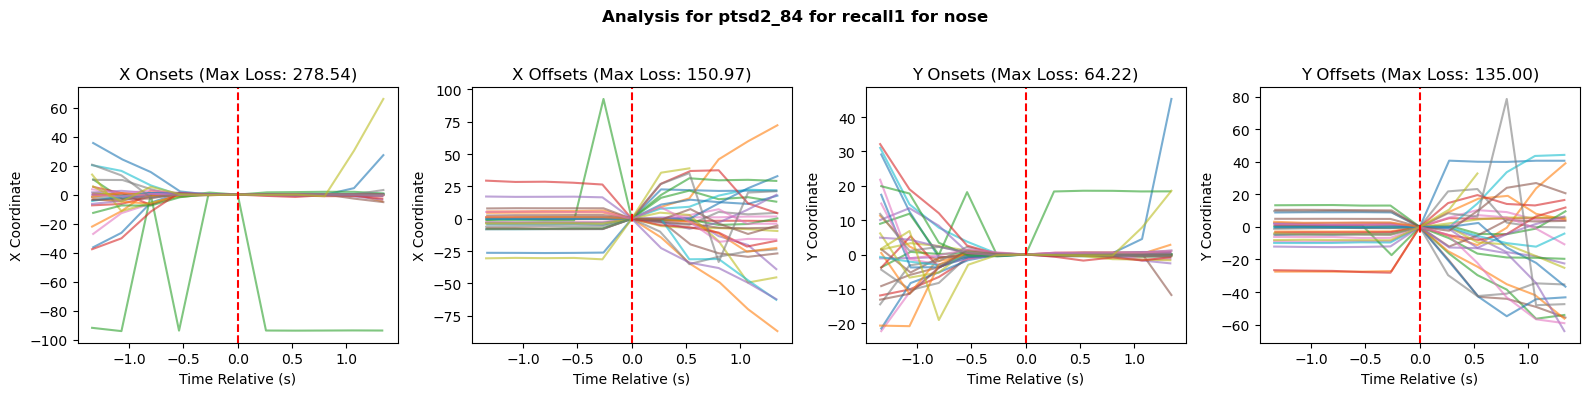

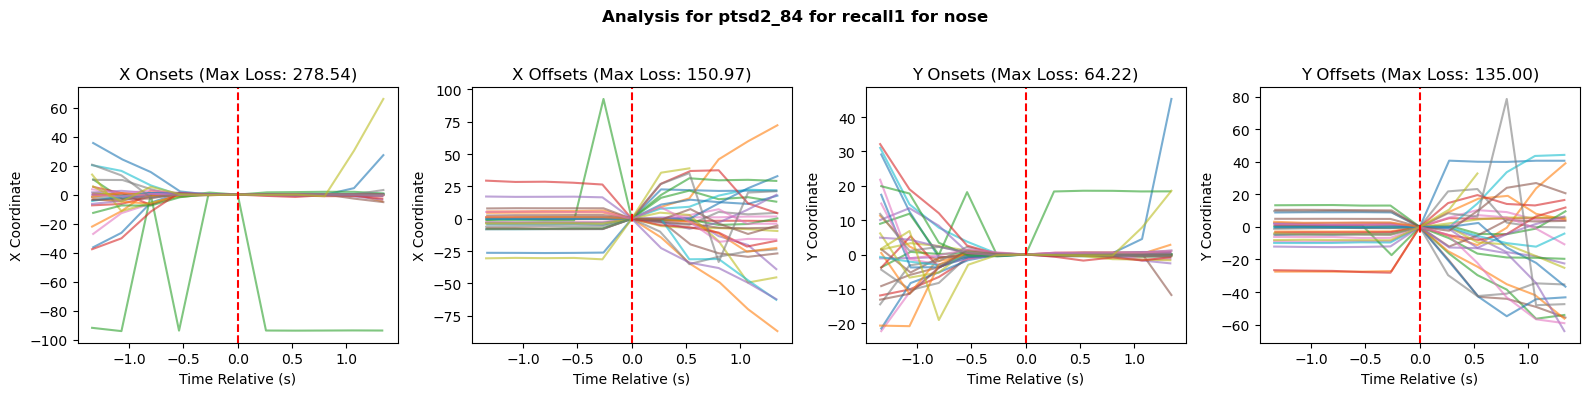

In [75]:
analyze_dlc_points_long_format(matched_points_try, dlc_ptsd2_84_recall1_1, 'nose')

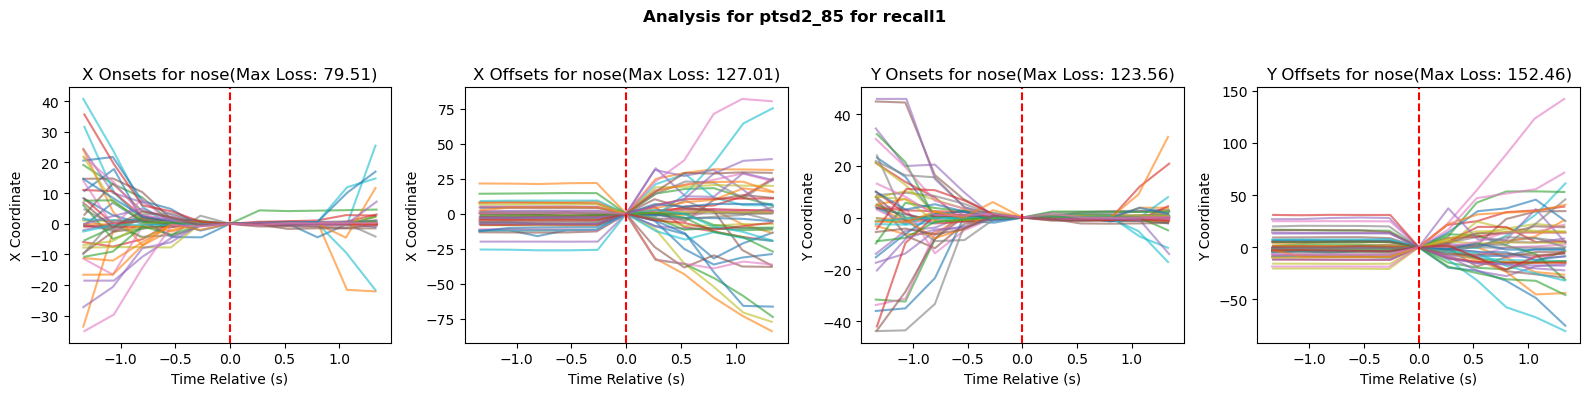

In [21]:
analyze_dlc_points_long_format(matched_points_try_2, dlc_ptsd2_85_recall1_1, 'nose')

In [76]:
def run_full_analysis(freeze_frame_data, dlc_data, body_part, margin=0.113, window_size=5, epsilon=0.5):
    """
    Runs the full analysis pipeline, including finding freeze transitions,
    matching timestamps, and calculating the average loss for a parameter setting.
    
    Parameters:
    - freeze_frame_data: DataFrame containing freeze frame data with 'freeze' and 't(sec)' columns.
    - dlc_data: DataFrame containing DLC data in long format with 't(sec)', 'x', 'y', 'body_part' columns.
    - body_part: The body part to analyze (e.g., 'nose'); used to filter specific x and y values in the long format.
    - margin: Time margin within which to match freeze frame timestamps to DLC timestamps.
    - window_size: The number of points before and after the matched point to consider in the loss calculation.
    - epsilon: Threshold for minimal change to define "stationary" behavior before the transition.
    
    Returns:
    - average_loss: Average loss for the given freeze frame parameter setting.
    """
    # Step 1: Find freeze-to-non-freeze transition timestamps
    freeze_timestamps = find_freeze_transitions(freeze_frame_data)
    
    # Step 2: Match timestamps in DLC data
    matched_timestamps = find_closest_timestamps(freeze_timestamps, dlc_data, body_part, margin)
    
    # Step 3: Calculate average loss for this parameter setting
    plots = analyze_dlc_points_long_format(matched_timestamps, dlc_data, body_part, window_size, epsilon)
    
    return plots


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


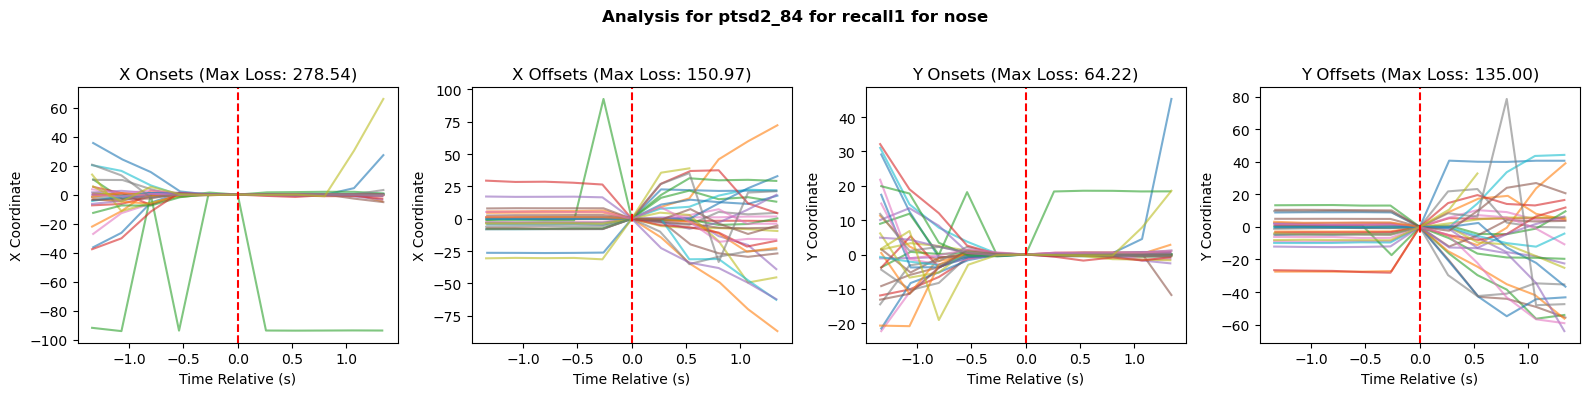

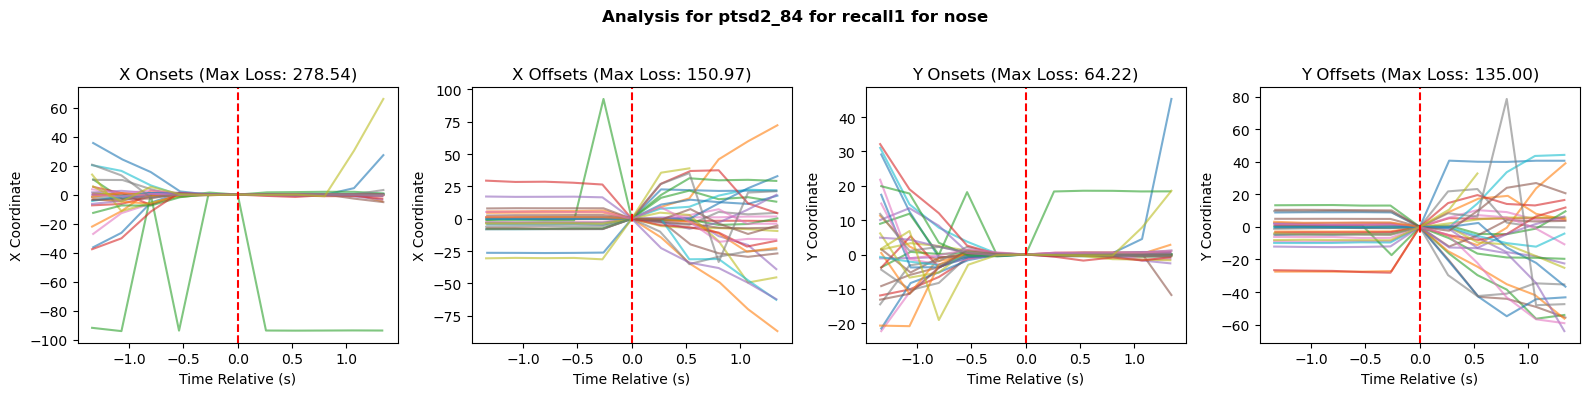

In [77]:
run_full_analysis(ptsd2_84_recall1_1, dlc_ptsd2_84_recall1_1, 'nose')

In [14]:
# import pandas as pd

# def average_loss_analysis(freeze_frame_data, dlc_data):
#     """
#     Analyzes average loss for each bout and body part across all cohort_id and day combinations.
    
#     Parameters:
#     - freeze_frame_data: DataFrame containing freeze frame data with columns 'cohort_id', 'day', 'bouts', and other relevant columns.
#     - dlc_data: DataFrame containing DLC data in long format with 'cohort_id', 'day', 'body_part', 't(sec)', 'x', 'y', etc.
    
#     Returns:
#     - result_df: DataFrame with averaged loss values across all cohort_id and day for each bout and body part.
#     """
#     # Extract unique values from data
#     bouts = freeze_frame_data['bouts'].unique()
#     cohort_ids = freeze_frame_data['cohort_id'].unique()
#     days = freeze_frame_data['day'].unique()
#     body_parts = dlc_data['body_part'].unique()
    
#     # Initialize an empty dictionary to store results
#     results = {body_part: [] for body_part in body_parts}
#     results['bout'] = []
#     results['Total'] = []
    
#     for bout in bouts:
#         # Filter the freeze frame data for the specific bout
#         bout_freeze_data = freeze_frame_data[freeze_frame_data['bouts'] == bout]
        
#         # Initialize a dictionary to store sum of losses for each body part for averaging
#         bout_loss_sum = {body_part: 0 for body_part in body_parts}
#         count = 0
        
#         # Loop through each unique cohort_id and day combination
#         for cohort_id in cohort_ids:
#             for day in days:
#                 # Filter data for the current cohort_id and day
#                 cohort_day_freeze_data = bout_freeze_data[(bout_freeze_data['cohort_id'] == cohort_id) & 
#                                                           (bout_freeze_data['day'] == day)]
#                 cohort_day_dlc_data = dlc_data[(dlc_data['cohort_id'] == cohort_id) & 
#                                                (dlc_data['day'] == day)]
                
#                 # Ensure data exists for the combination
#                 if cohort_day_freeze_data.empty or cohort_day_dlc_data.empty:
#                     print(f"No data found for {cohort_id}, {day}.")    
#                     continue
                
#                 # Run full analysis for each body part and accumulate the loss
#                 for body_part in body_parts:
#                     try:
#                         loss = run_full_analysis(cohort_day_freeze_data, cohort_day_dlc_data, body_part=body_part)
#                         bout_loss_sum[body_part] += loss
#                     except Exception as e:
#                         print(f"Error processing {cohort_id}, {day}, {body_part}: {e}")
#                         continue
#                 count += 1
        
#         # Calculate average loss for each body part for the current bout
#         bout_average_losses = {body_part: (bout_loss_sum[body_part] / count if count > 0 else 0) for body_part in body_parts}
#         bout_total = sum(bout_average_losses.values())  # Total loss for the bout
        
#         # Append results for the current bout
#         for body_part, avg_loss in bout_average_losses.items():
#             results[body_part].append(avg_loss)
#         results['bout'].append(bout)
#         results['Total'].append(bout_total)
    
#     # Create a DataFrame from results dictionary
#     result_df = pd.DataFrame(results)
#     result_df.set_index('bout', inplace=False)
#     return result_df




In [26]:
# # Example usage
# # Assuming freeze_frame_data and dlc_data are already defined and contain the expected columns
# result_df = average_loss_analysis(freeze_frame, dlc_frames)

In [79]:
from matplotlib.backends.backend_pdf import PdfPages
import os

def generate_bout_plots_with_analysis(freeze_frame_data, dlc_data, output_folder, margin=0.113, window_size=5, epsilon=0.5):
    """
    Generate and save analysis plots for all cohort IDs, days, and body parts for each bout value.
    
    Parameters:
    - freeze_frame_data: DataFrame with freeze frame data, including 'bouts', 'cohort_id', 'day', and other relevant columns.
    - dlc_data: DataFrame with DLC data, including 'cohort_id', 'day', 'body_part', 't(sec)', 'x', 'y', etc.
    - output_folder: Folder where the PDFs will be saved.
    - margin: Time margin for matching timestamps (default is 0.113 seconds).
    - window_size: Number of points before/after the transition for loss calculation (default is 5).
    - epsilon: Threshold for minimal change to define "stationary" behavior before the transition (default is 0.5).
    """

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Extract unique values
    bouts = freeze_frame_data['bouts'].unique()
    cohort_ids = freeze_frame_data['cohort_id'].unique()
    days = freeze_frame_data['day'].unique()
    body_parts = dlc_data['body_part'].unique()
    
    for bout in bouts:
        # Open a single PDF for the current bout
        pdf_file = os.path.join(output_folder, f"bout_{bout}_plots.pdf")
        with PdfPages(pdf_file) as pdf:
            print(f"Generating plots for Bout {bout}...")
            
            for cohort_id in cohort_ids:
                for day in days:
                    print(f"  Processing Cohort {cohort_id}, Day {day}...")
                    
                    # Filter freeze frame data for the specific cohort_id, day, and bout
                    cohort_day_freeze_data = freeze_frame_data[
                        (freeze_frame_data['cohort_id'] == cohort_id) &
                        (freeze_frame_data['day'] == day) &
                        (freeze_frame_data['bouts'] == bout)
                    ]
                    
                    # Ensure freeze frame data exists for this cohort_id, day, and bout
                    if cohort_day_freeze_data.empty:
                        print(f"  Skipping Cohort {cohort_id}, Day {day}: No freeze frame data for Bout {bout}.")
                        continue
                    
                    for body_part in body_parts:
                        print(f"    Analyzing Body Part: {body_part}...")
                        
                        # Filter DLC data for the specific cohort_id, day, and body part
                        cohort_day_dlc_data = dlc_data[
                            (dlc_data['cohort_id'] == cohort_id) &
                            (dlc_data['day'] == day) &
                            (dlc_data['body_part'] == body_part)
                        ]
                        
                        # Ensure DLC data exists for this cohort_id, day, and body part
                        if cohort_day_dlc_data.empty:
                            print(f"    Skipping Body Part {body_part}: No DLC data for Cohort {cohort_id}, Day {day}.")
                            continue
                        
                        try:
                            # Explicitly create a new figure for the analysis
        
                            # Run full analysis (this function handles plotting)
                            fig = run_full_analysis(
                                cohort_day_freeze_data, cohort_day_dlc_data, body_part,
                                margin=.113, window_size=5, epsilon=.5
                            )
                            
                            # Save the current figure to the PDF
                            pdf.savefig(fig)  # Explicitly save the new figure to the PDF
                            plt.close(fig)  # Close the figure to free up memory

                        except Exception as e:
                            print(f"    Error processing Cohort {cohort_id}, Day {day}, Body Part {body_part}: {e}")
                            continue
            
            print(f"Saved all plots for Bout {bout} to {pdf_file}.")

    


    # for bout in bouts:
    #     # Create a new PDF for the current bout
    #     pdf_file = os.path.join(output_folder, f"bout_{bout}_plots.pdf")
    #     with PdfPages(pdf_file) as pdf:
    #         print(f"Generating plots for Bout {bout}...")
            
    #         for cohort_id in cohort_ids:
    #             for day in days:
    #                 print(f"  Processing Cohort {cohort_id}, Day {day}...")
                    
    #                 # Filter freeze frame data for the specific cohort_id, day, and bout
    #                 cohort_day_freeze_data = freeze_frame_data[
    #                     (freeze_frame_data['cohort_id'] == cohort_id) &
    #                     (freeze_frame_data['day'] == day) &
    #                     (freeze_frame_data['bouts'] == bout)
    #                 ]
                    
    #                 # Ensure freeze frame data exists for this cohort_id, day, and bout
    #                 if cohort_day_freeze_data.empty:
    #                     print(f"  Skipping Cohort {cohort_id}, Day {day}: No freeze frame data for Bout {bout}.")
    #                     continue
                    
    #                 for body_part in body_parts:
    #                     print(f"    Analyzing Body Part: {body_part}...")
                        
    #                     # Filter DLC data for the specific cohort_id, day, and body part
    #                     cohort_day_dlc_data = dlc_data[
    #                         (dlc_data['cohort_id'] == cohort_id) &
    #                         (dlc_data['day'] == day) &
    #                         (dlc_data['body_part'] == body_part)
    #                     ]
                        
    #                     # Ensure DLC data exists for this cohort_id, day, and body part
    #                     if cohort_day_dlc_data.empty:
    #                         print(f"    Skipping Body Part {body_part}: No DLC data for Cohort {cohort_id}, Day {day}.")
    #                         continue
                        
    #                     try:
    #                         # Run full analysis (this function will handle plotting)
    #                         run_full_analysis(
    #                             cohort_day_freeze_data, cohort_day_dlc_data, body_part,
    #                             margin=margin, window_size=window_size, epsilon=epsilon
    #                         )
                            
    #                         # Save the figure from `run_full_analysis` to the PDF
    #                         pdf.savefig(plt.gcf())  # Save the current figure to the PDF
    #                         plt.close()  # Close the current figure
                            
    #                     except Exception as e:
    #                         print(f"    Error processing Cohort {cohort_id}, Day {day}, Body Part {body_part}: {e}")
    #                         continue
            
    #         print(f"Saved all plots for Bout {bout} to {pdf_file}.")


In [ ]:
output_folder = '/Users/novak/Documents/Columbia/mentored_research/Turi/try_folder_plots'
generate_bout_plots_with_analysis(freeze_frame, dlc_frames, output_folder, margin=0.113, window_size=5, epsilon=0.5)


In [59]:
body_parts = dlc_frames['body_part'].unique()
days = freeze_frame['day'].unique()
cohort_ids = ['ptsd2_85']
bouts = [1.0]


In [48]:
type(freeze_frame['bouts'][0])

numpy.float64

In [52]:
# freeze_frame[
#             (freeze_frame['cohort_id'] == cohort_id) &
#             (freeze_frame['day'] == day) &
#             (freeze_frame['bouts'] == bout)]

t(sec)  motion_index  freeze cohort_id      day  bouts
11230    0.00         84.63       0  ptsd2_85  recall1    1.0
11231    0.57         39.07       0  ptsd2_85  recall1    1.0
11232    0.80        100.29       0  ptsd2_85  recall1    1.0
11233    1.07        108.27       0  ptsd2_85  recall1    1.0
11234    1.34        123.93       0  ptsd2_85  recall1    1.0
...       ...           ...     ...       ...      ...    ...
12348  298.71         48.81       0  ptsd2_85  recall1    1.0
12349  298.98         42.78       0  ptsd2_85  recall1    1.0
12350  299.24         45.80       0  ptsd2_85  recall1    1.0
12351  299.51         35.50       0  ptsd2_85  recall1    1.0
12352  299.78         41.63       0  ptsd2_85  recall1    1.0

[1123 rows x 6 columns]

Generating plots for Bout 1.0...
  Processing Cohort ptsd2_85, Day recall4...
    Analyzing Body Part: nose...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


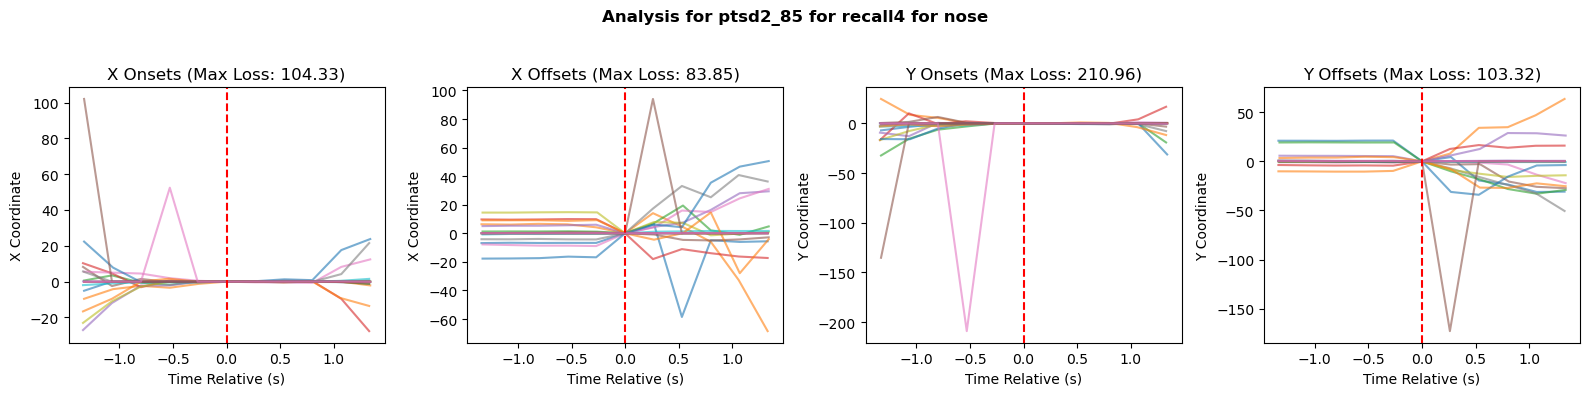

    Analyzing Body Part: head...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


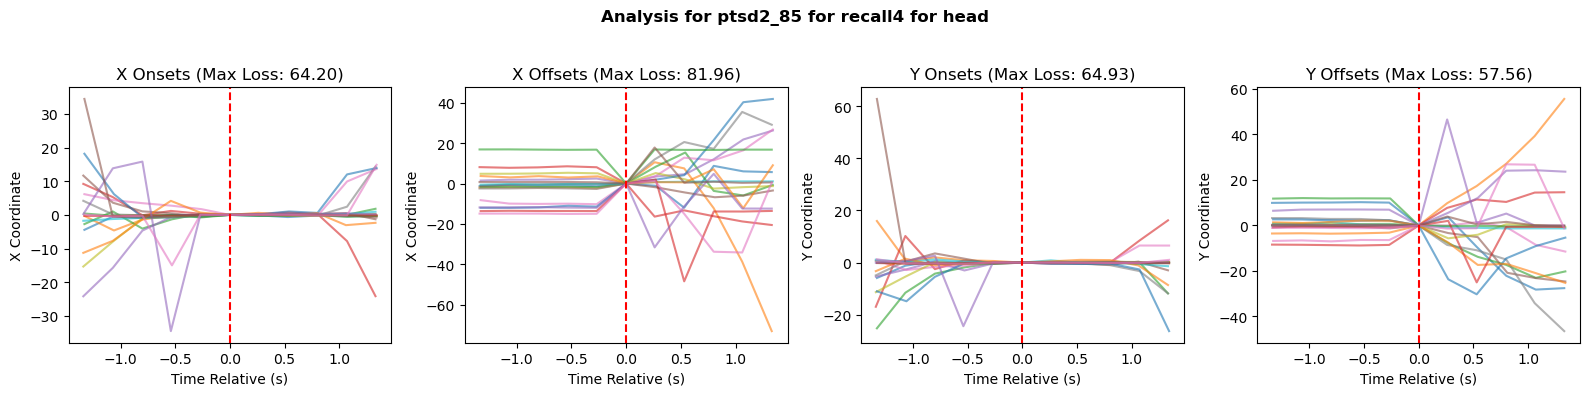

    Analyzing Body Part: right_ear...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


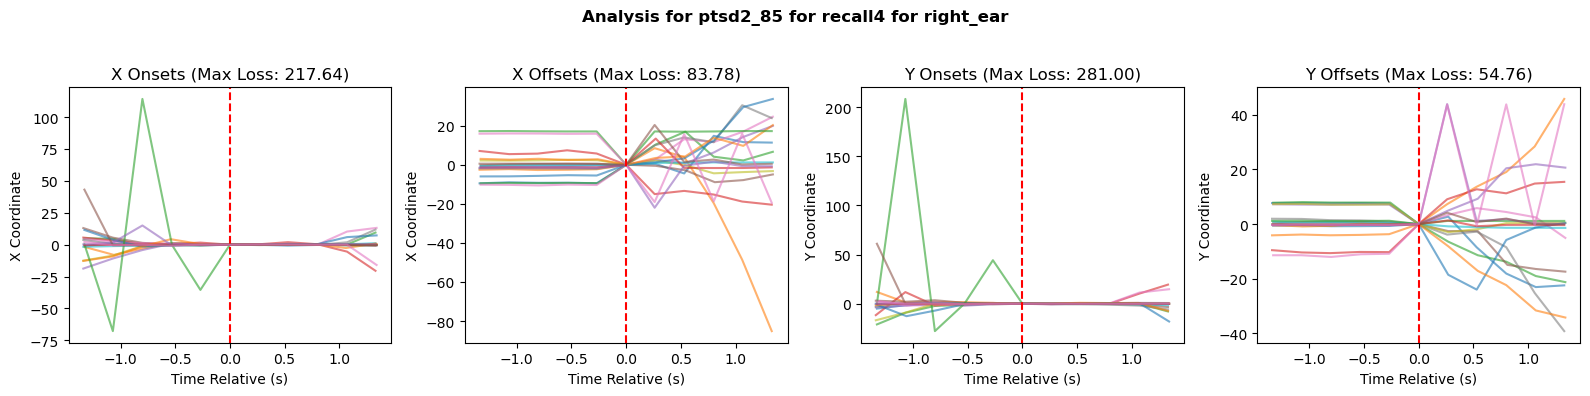

    Analyzing Body Part: left_ear...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


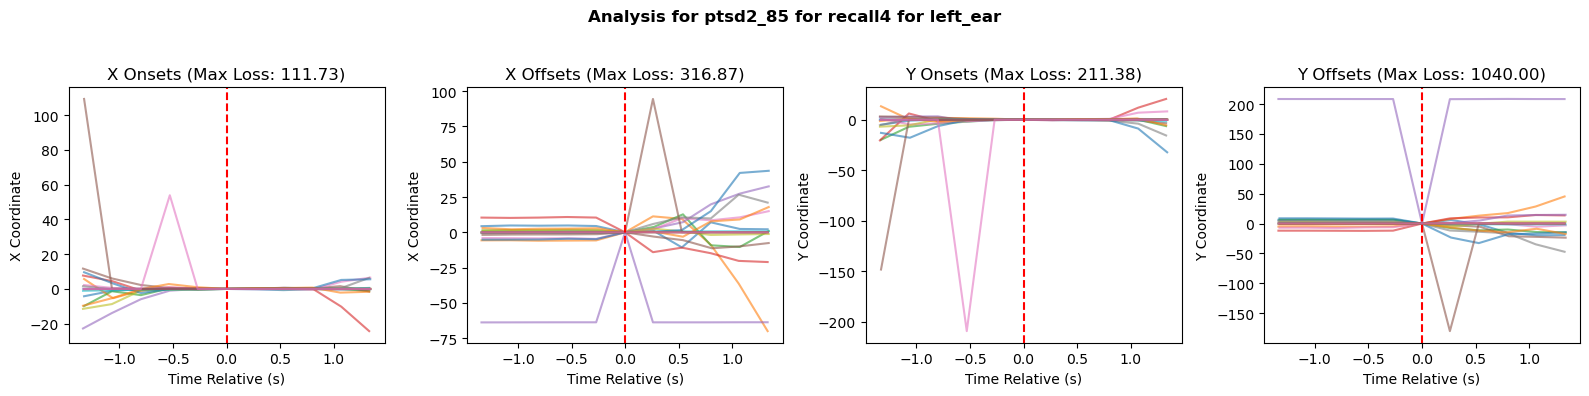

    Analyzing Body Part: neck...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


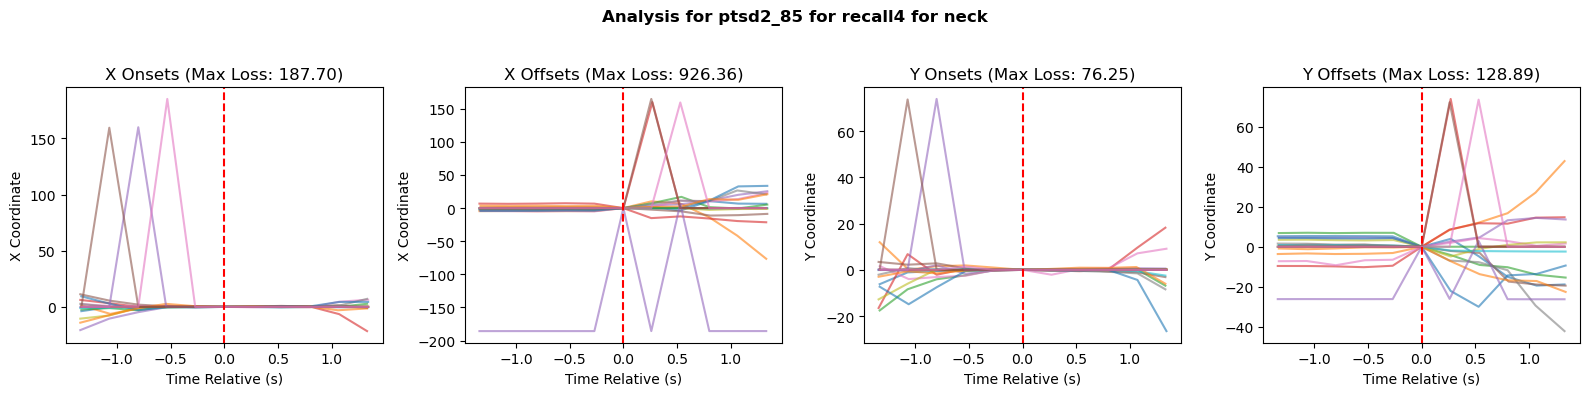

    Analyzing Body Part: back2...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


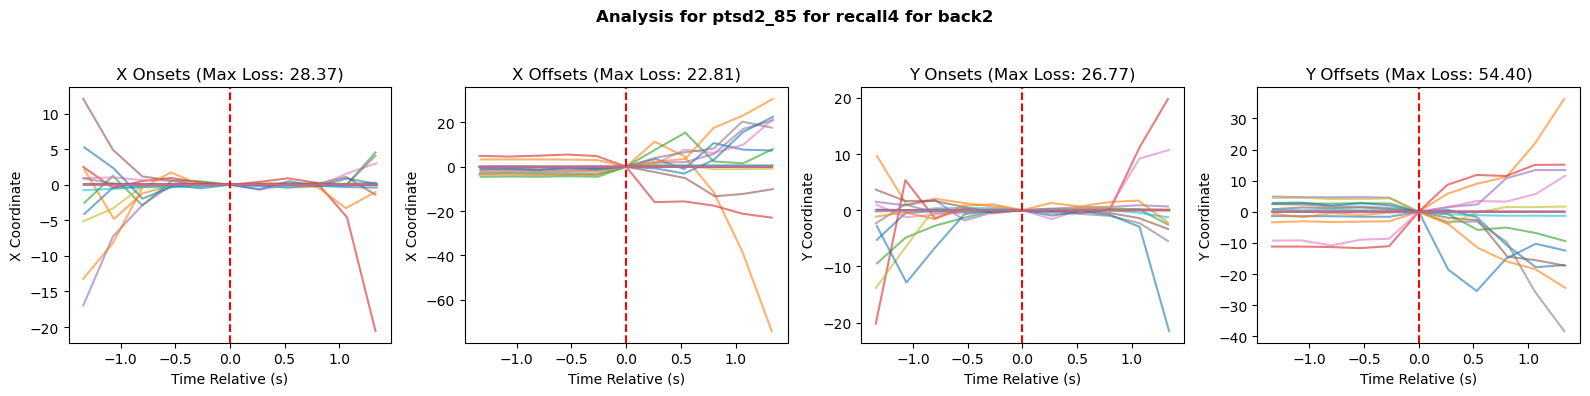

    Analyzing Body Part: back1...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


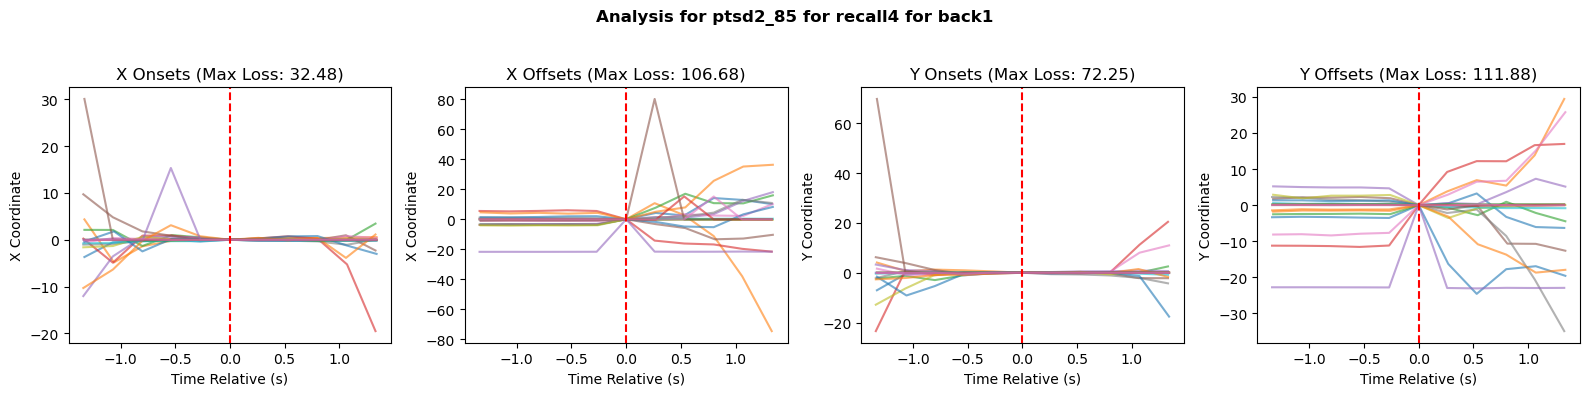

    Analyzing Body Part: back3...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


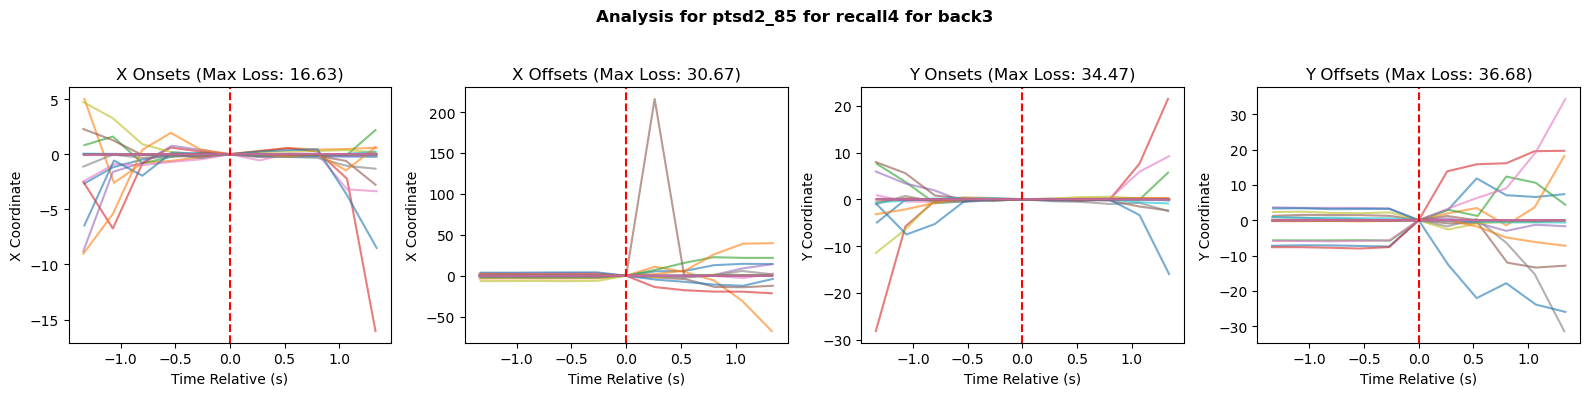

    Analyzing Body Part: back4...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


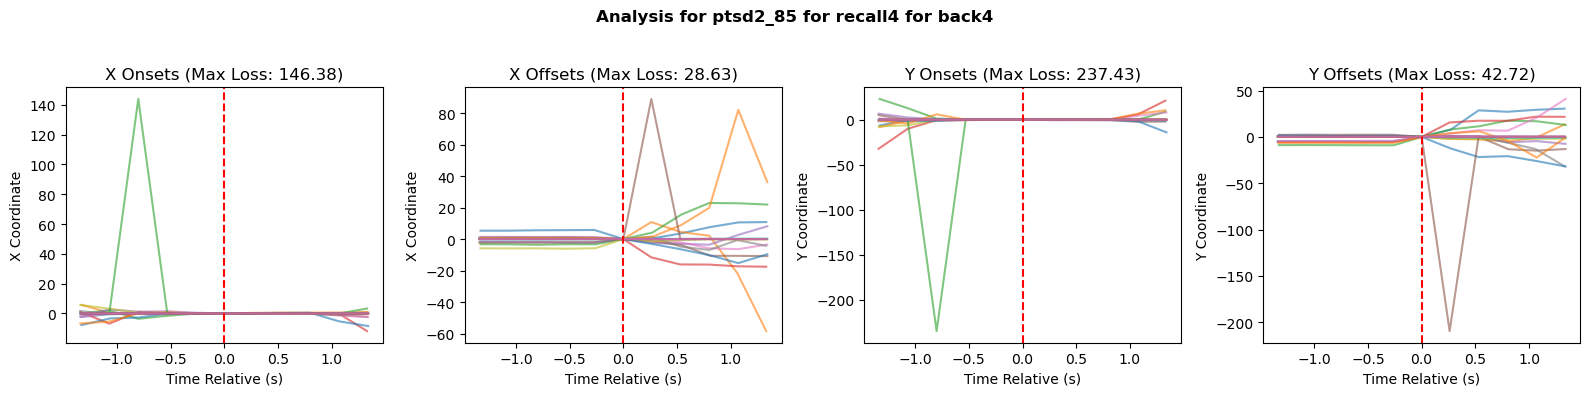

    Analyzing Body Part: tail_base...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


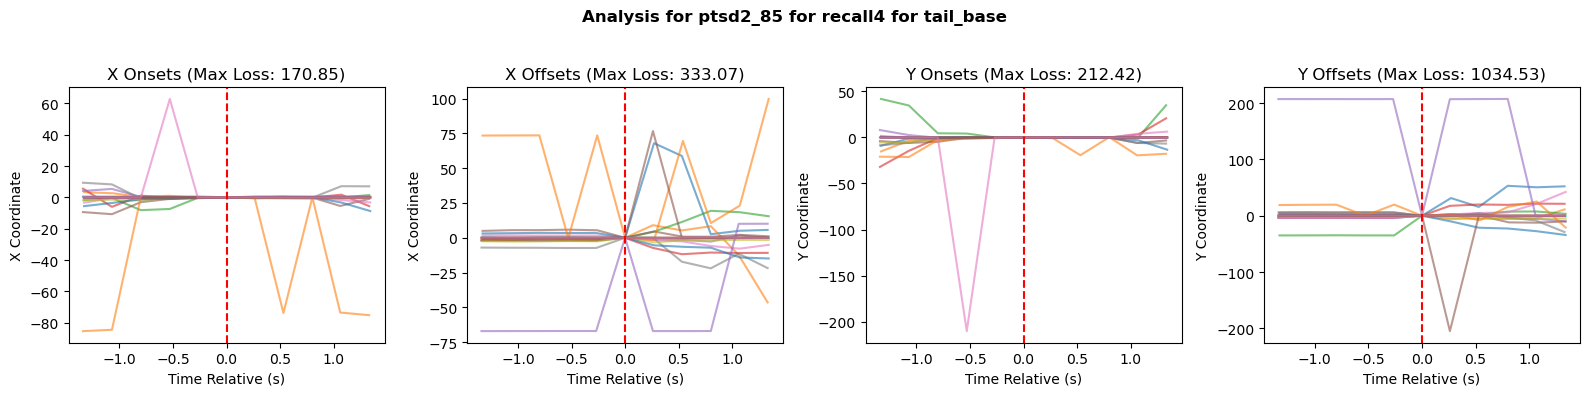

    Analyzing Body Part: tail1...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


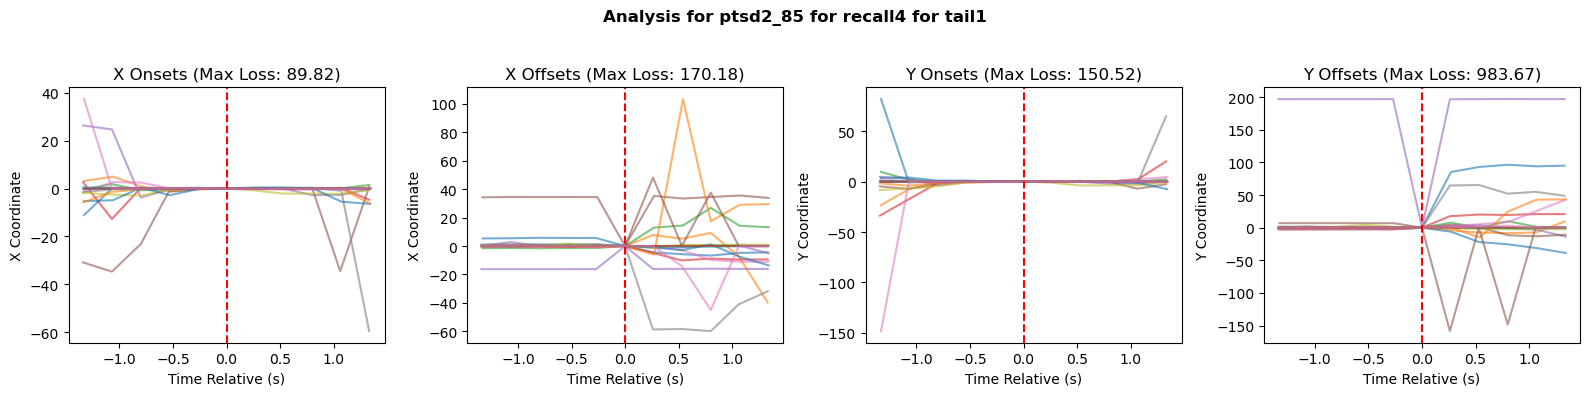

    Analyzing Body Part: tail2...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


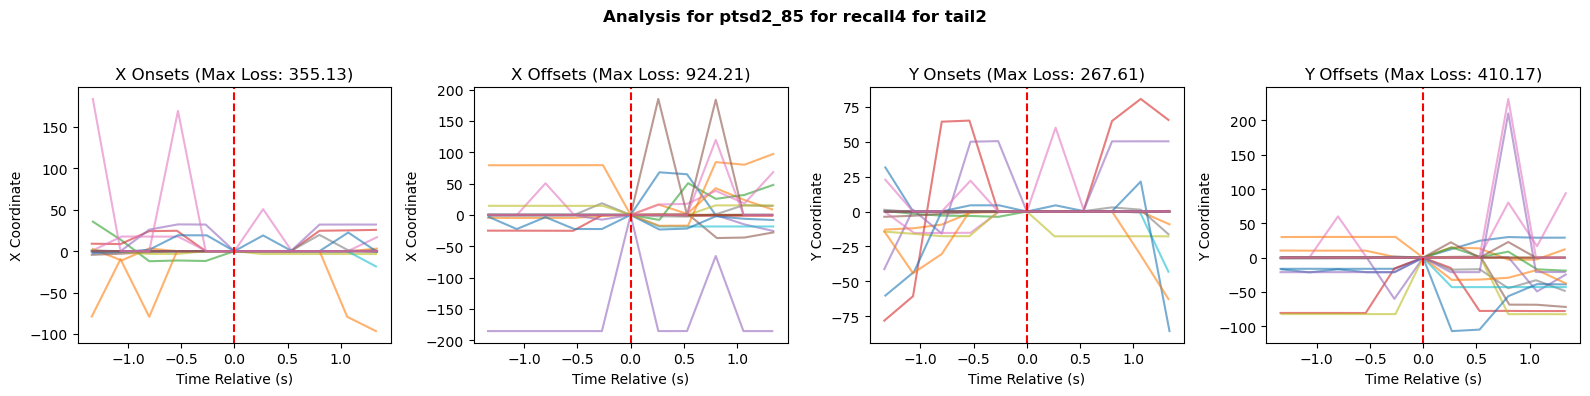

  Processing Cohort ptsd2_85, Day recall1...
    Analyzing Body Part: nose...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


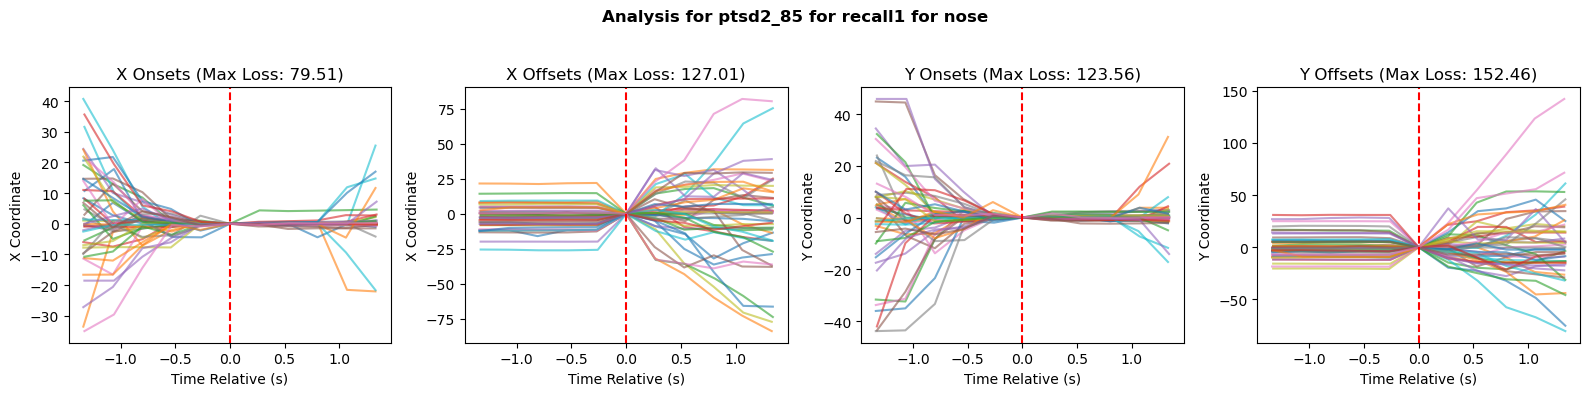

    Analyzing Body Part: head...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


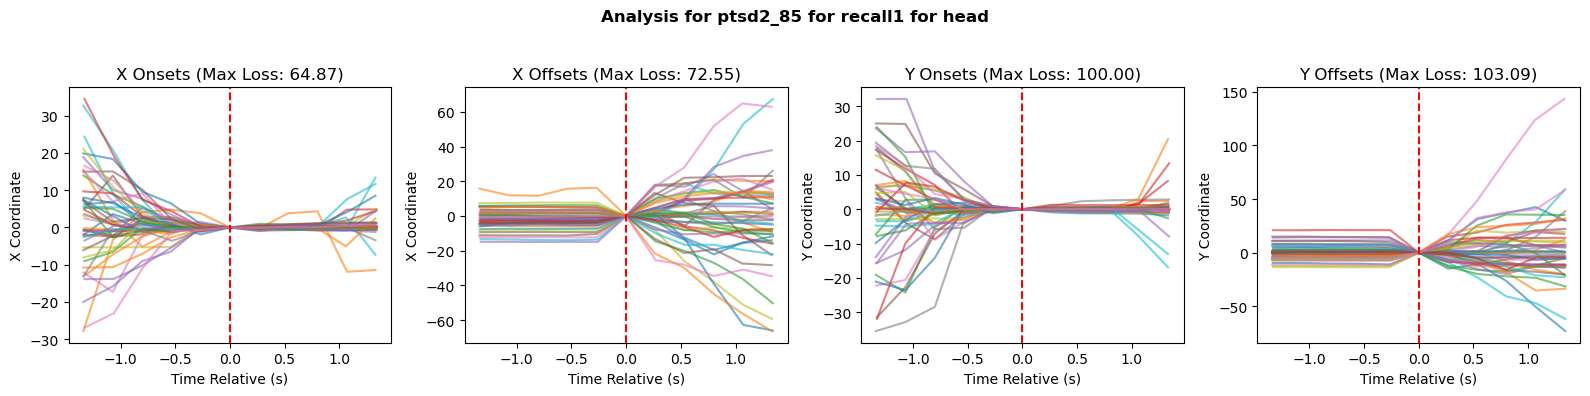

    Analyzing Body Part: right_ear...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


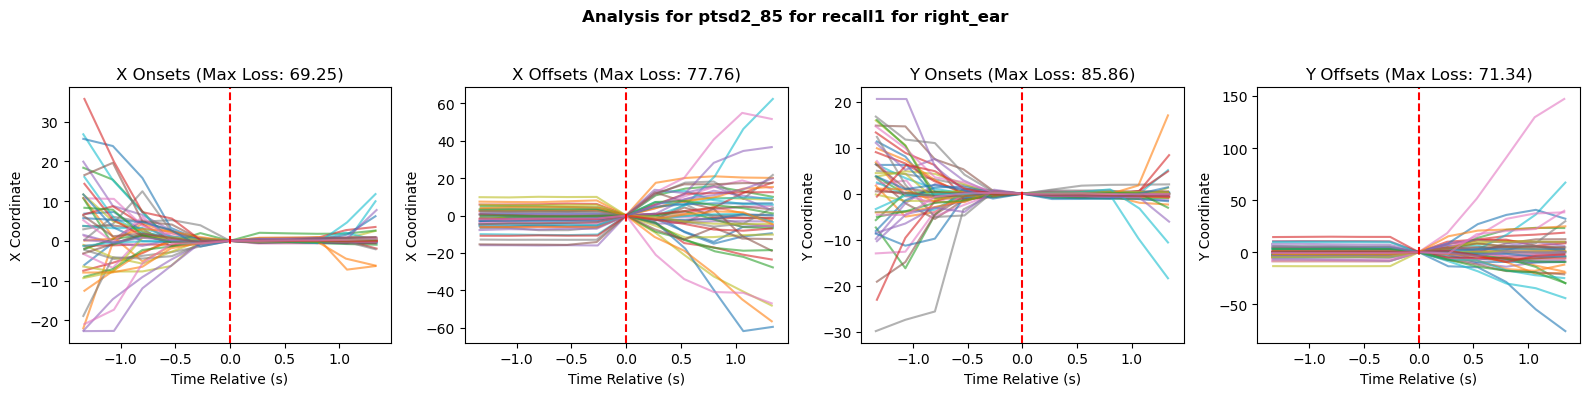

    Analyzing Body Part: left_ear...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


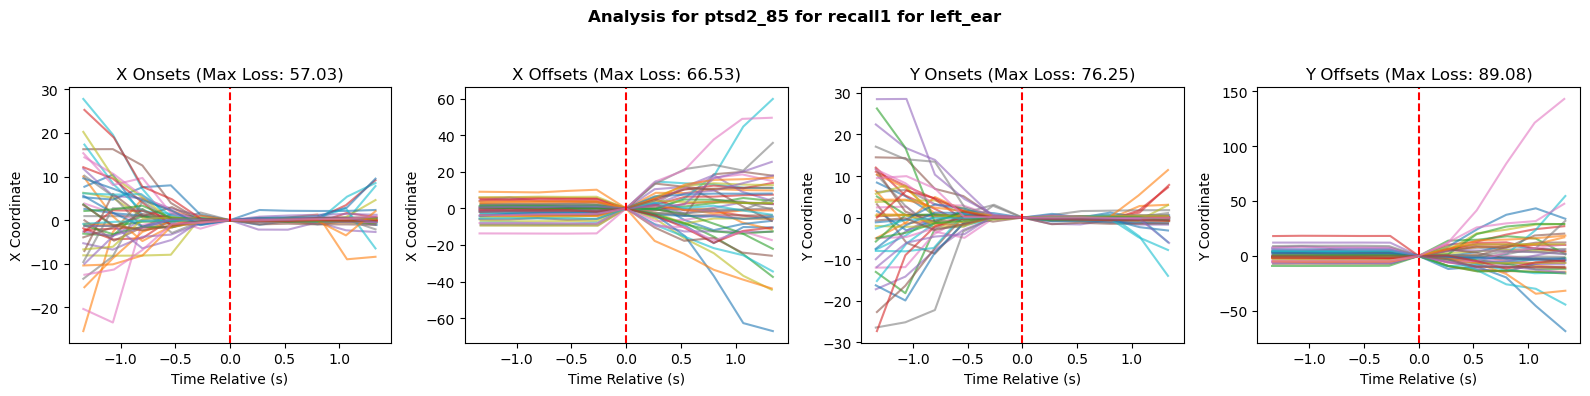

    Analyzing Body Part: neck...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


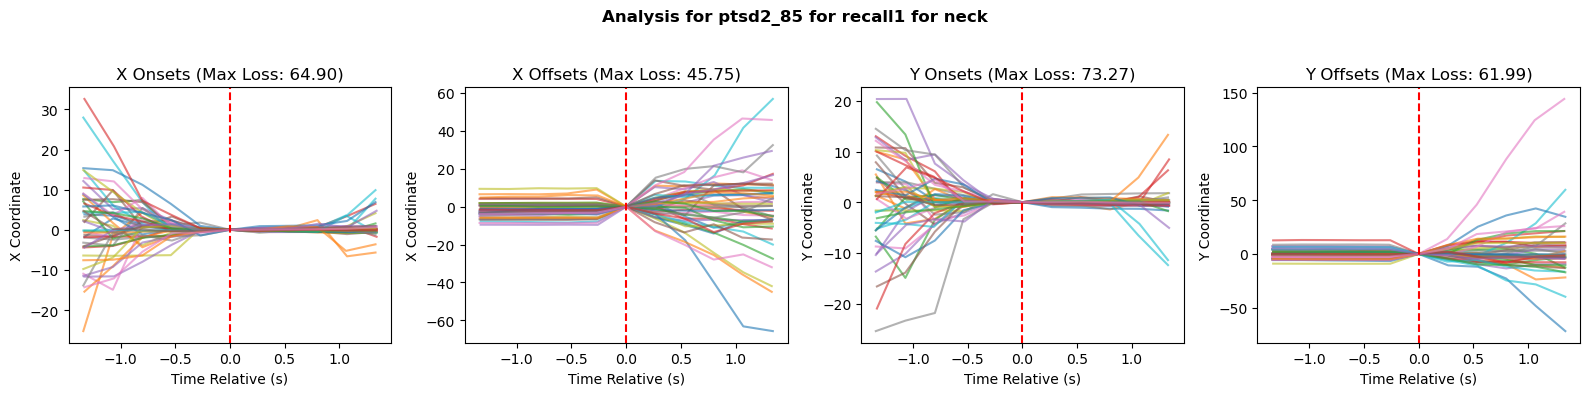

    Analyzing Body Part: back2...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


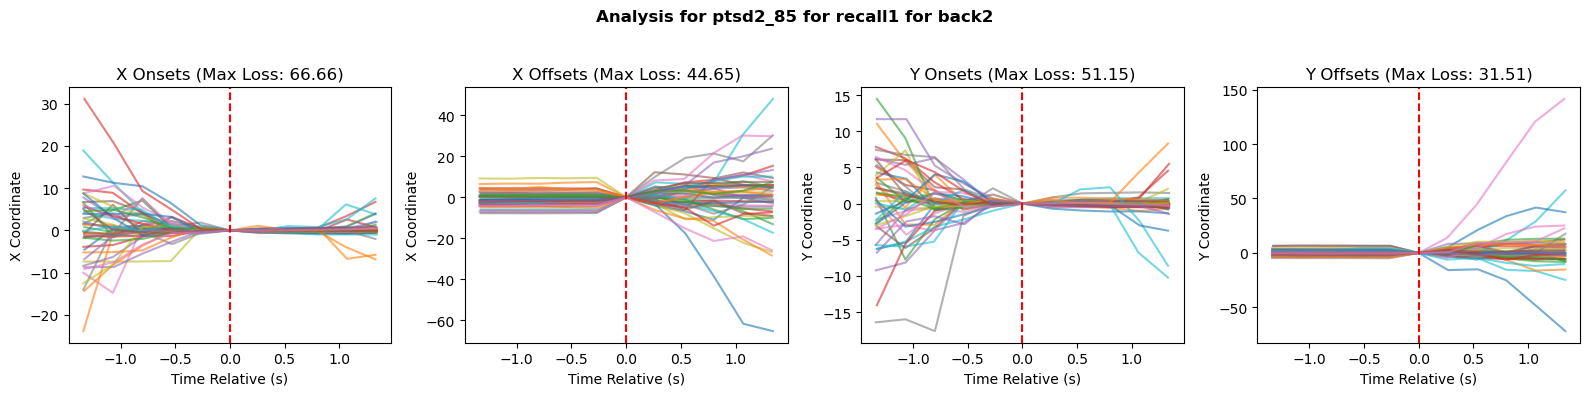

    Analyzing Body Part: back1...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


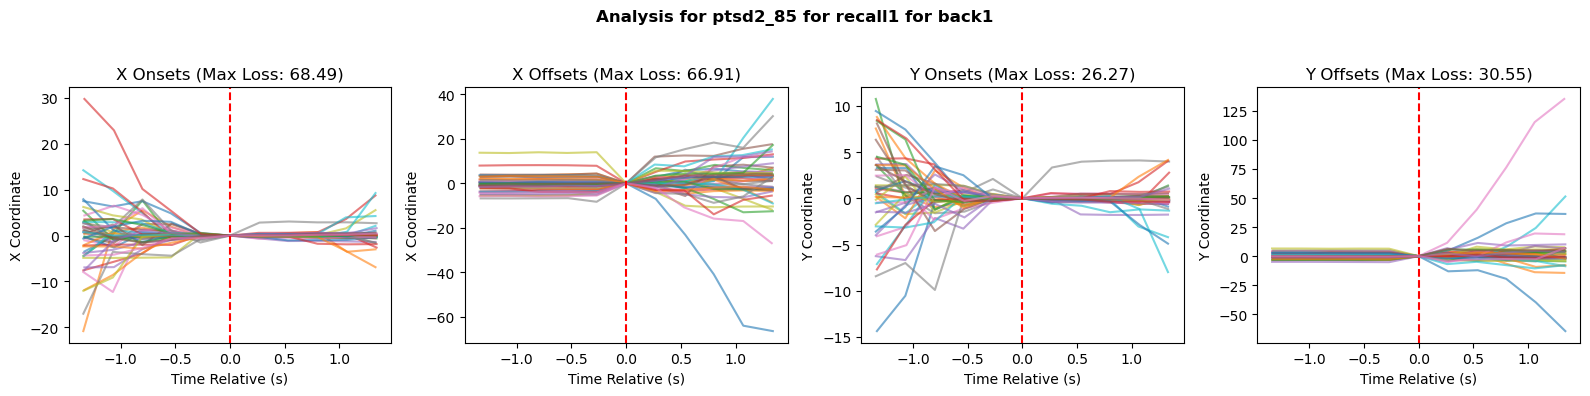

    Analyzing Body Part: back3...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


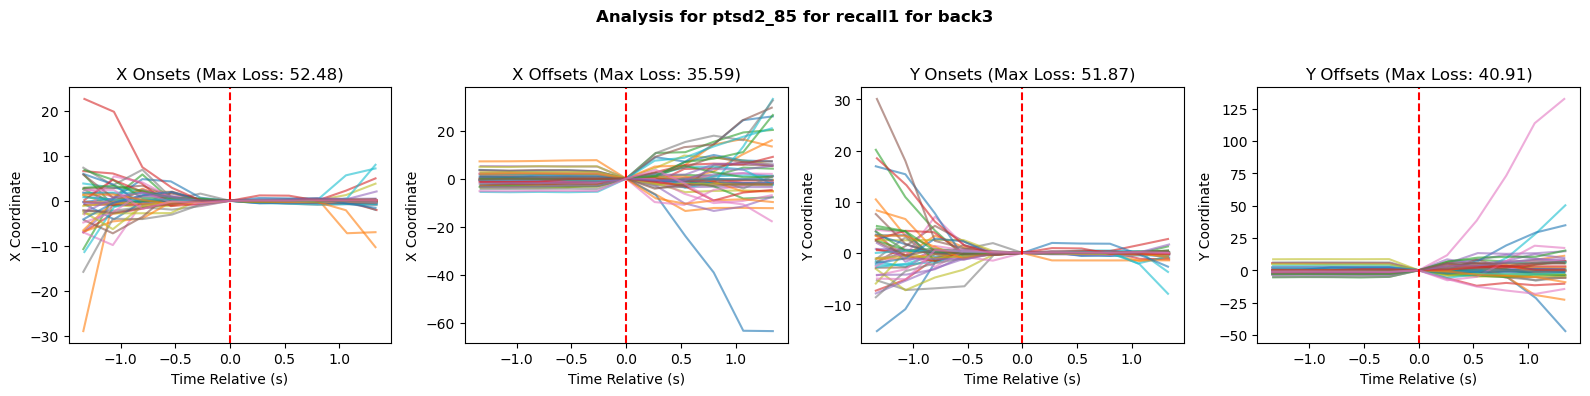

    Analyzing Body Part: back4...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


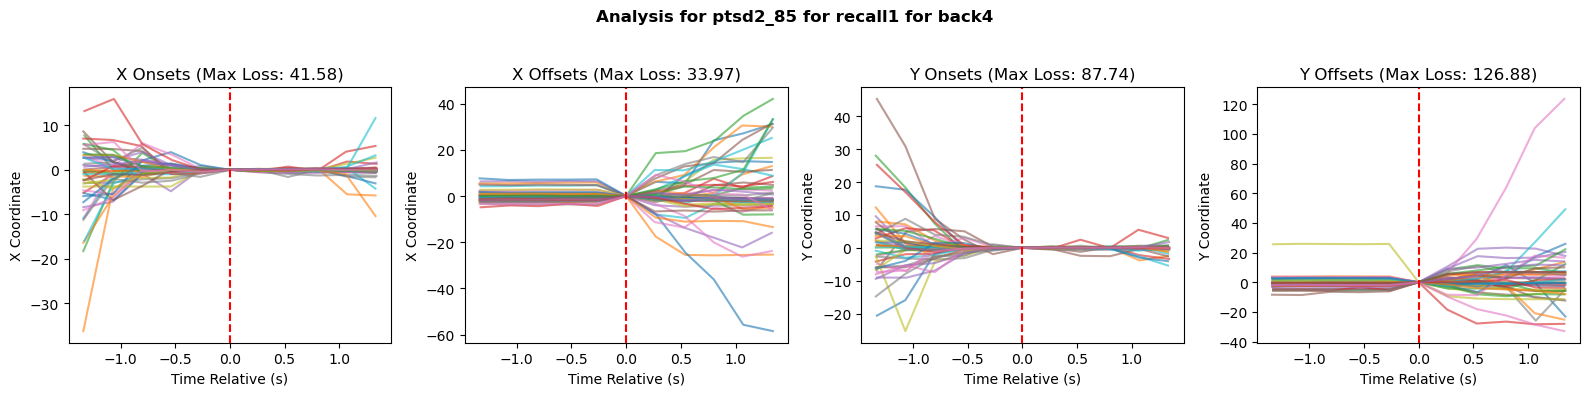

    Analyzing Body Part: tail_base...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


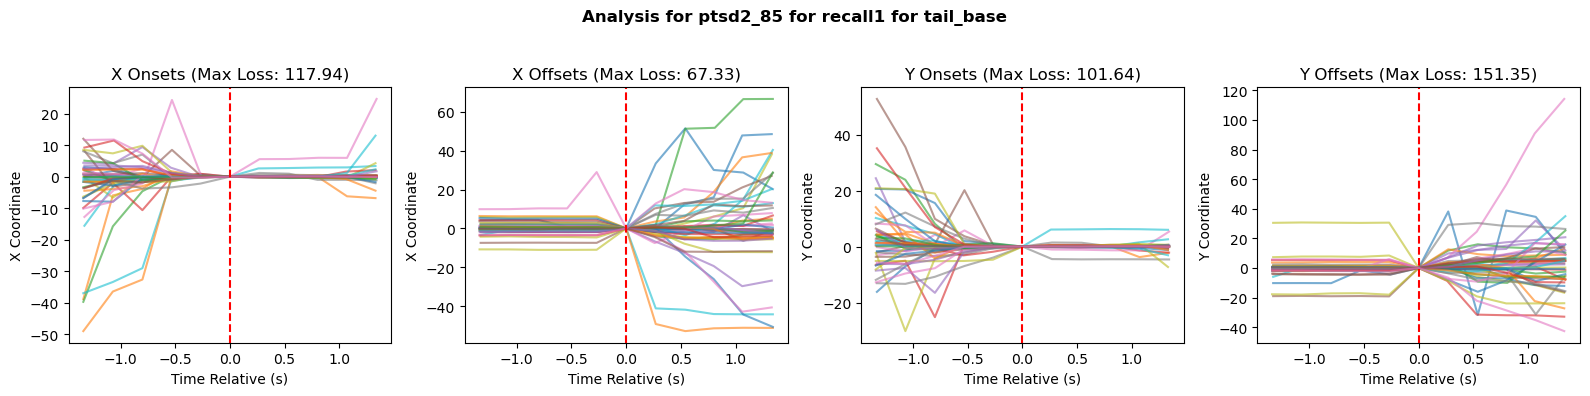

    Analyzing Body Part: tail1...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


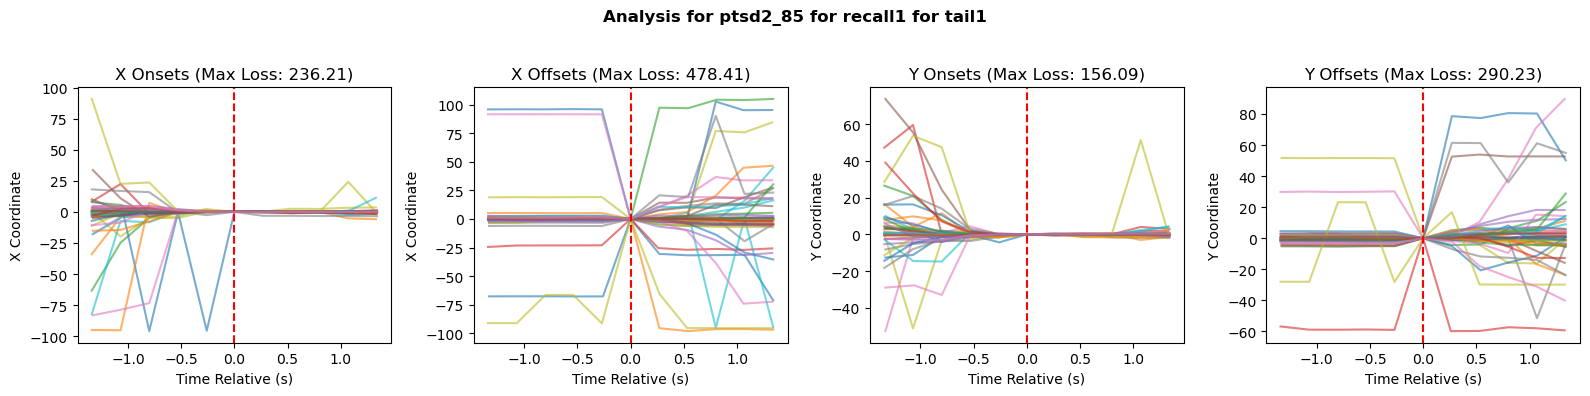

    Analyzing Body Part: tail2...


/var/folders/nh/hjw01w5j4k7csj4x6k02jv000000gn/T/ipykernel_40277/1788550859.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freeze_frame_data['freeze_shift'] = freeze_frame_data['freeze'].shift(1, fill_value=0)


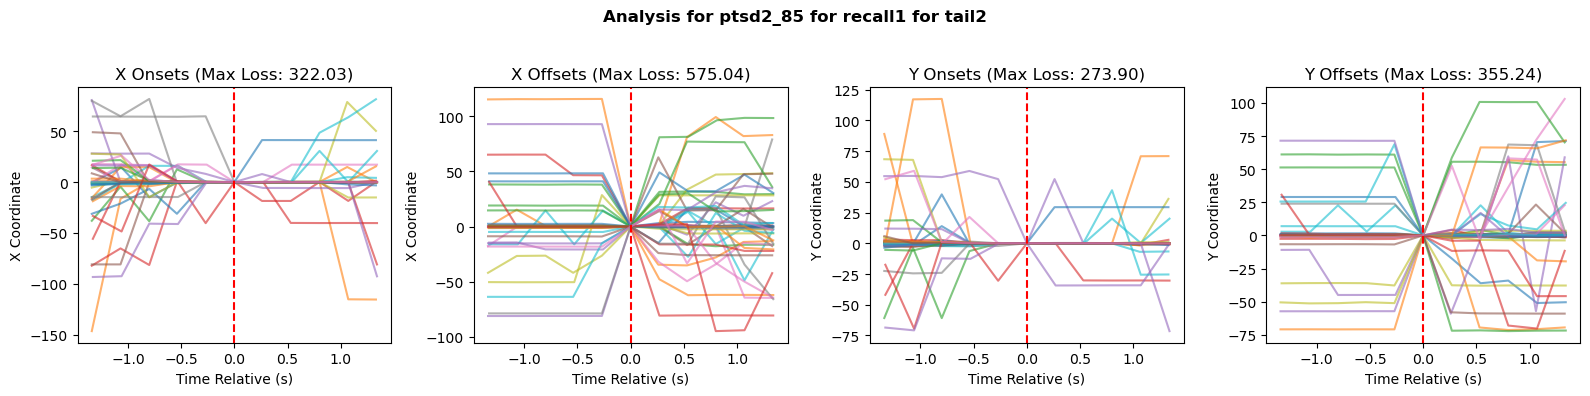

Saved all plots for Bout 1.0 to /Users/novak/Documents/Columbia/mentored_research/Turi/try_folder_plots/bout_1.0_plots.pdf.


In [78]:
output_folder = '/Users/novak/Documents/Columbia/mentored_research/Turi/try_folder_plots'


if not os.path.exists(output_folder):
    os.makedirs(output_folder)


for bout in bouts:
    # Open a single PDF for the current bout
    pdf_file = os.path.join(output_folder, f"bout_{bout}_plots.pdf")
    with PdfPages(pdf_file) as pdf:
        print(f"Generating plots for Bout {bout}...")
        
        for cohort_id in cohort_ids:
            for day in days:
                print(f"  Processing Cohort {cohort_id}, Day {day}...")
                
                # Filter freeze frame data for the specific cohort_id, day, and bout
                cohort_day_freeze_data = freeze_frame_data[
                    (freeze_frame_data['cohort_id'] == cohort_id) &
                    (freeze_frame_data['day'] == day) &
                    (freeze_frame_data['bouts'] == bout)
                ]
                
                # Ensure freeze frame data exists for this cohort_id, day, and bout
                if cohort_day_freeze_data.empty:
                    print(f"  Skipping Cohort {cohort_id}, Day {day}: No freeze frame data for Bout {bout}.")
                    continue
                
                for body_part in body_parts:
                    print(f"    Analyzing Body Part: {body_part}...")
                    
                    # Filter DLC data for the specific cohort_id, day, and body part
                    cohort_day_dlc_data = dlc_data[
                        (dlc_data['cohort_id'] == cohort_id) &
                        (dlc_data['day'] == day) &
                        (dlc_data['body_part'] == body_part)
                    ]
                    
                    # Ensure DLC data exists for this cohort_id, day, and body part
                    if cohort_day_dlc_data.empty:
                        print(f"    Skipping Body Part {body_part}: No DLC data for Cohort {cohort_id}, Day {day}.")
                        continue
                    
                    try:
                        # Explicitly create a new figure for the analysis
    
                        # Run full analysis (this function handles plotting)
                        fig = run_full_analysis(
                            cohort_day_freeze_data, cohort_day_dlc_data, body_part,
                            margin=.113, window_size=5, epsilon=.5
                        )
                        
                        # Save the current figure to the PDF
                        pdf.savefig(fig)  # Explicitly save the new figure to the PDF
                        plt.close(fig)  # Close the figure to free up memory

                    except Exception as e:
                        print(f"    Error processing Cohort {cohort_id}, Day {day}, Body Part {body_part}: {e}")
                        continue
        
        print(f"Saved all plots for Bout {bout} to {pdf_file}.")